## HomeWork 3

###  Ehsan Dashti
###  s316511@studenti.polito.it

## Problem 1
## A)
#### simulate an epidemic 

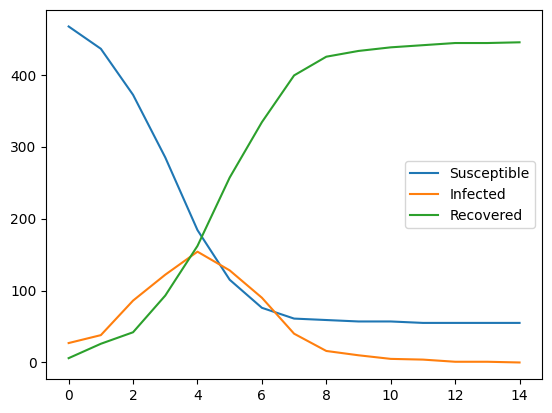

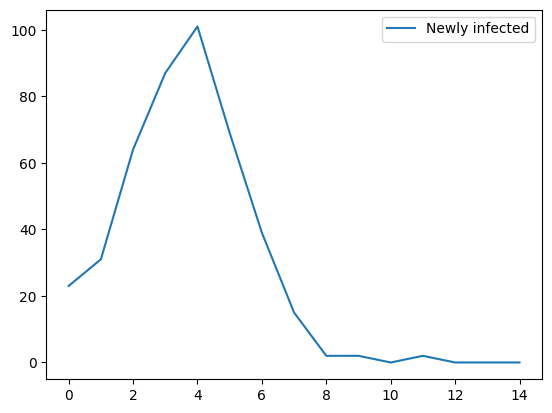

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
# Generate a random regular graph
G = nx.random_regular_graph(6, 500)

#The Naive SIR model.
def model(G, beta = 0.25, rho = 0.6):
    #Store the connection of nodes.
    w = nx.to_numpy_array(G)
    #To store newly_infected per week.
    newly_infecteds = []
    #To store number of each state per week.
    count_states = []
    states = np.zeros(500)
    #statrting with 10 Infected Individuals.
    startingInfected = np.random.choice(500,10, replace = False)
    for i in startingInfected:
        #putting the state of the infected people to 1 (which means they are infected.)
        states[i] = 1
    #Repeat for 15 weeks.
    for i in range(15):
        newly_infected = 0
        #update the state of each individual.
        for j in range(500):
            m = 0
            if states[j] == 1:
                #if infected see if they will recover.
                states[j] = np.random.choice([1,2], p = [1.0-rho,rho])
            if states[j] == 0:
                #if susceptible see count the number of its infected neighbours and see if they will get infected.
                neighbours = [i for i, x in enumerate(w[j]) if x == 1]
                for neighbour in neighbours:
                    if states[neighbour] == 1:
                        m += 1
                states[j] = np.random.binomial(1, 1 - ((1 - beta) ** m))
                if states[j] == 1:
                    #if he gets infected count it.
                    newly_infected += 1
        #after each week store the number of newly infected.
        newly_infecteds.append(newly_infected)
        states = list(states)
        #after each week store the number of inidviduals in each state.
        count_state = [states.count(0), states.count(1), states.count(2)]
        count_states.append(count_state)
    return count_states, newly_infecteds

G = nx.random_regular_graph(6, 500)
count_states, newly_infecteds = model(G)
count_states = np.array(count_states)
plt.plot(count_states[:,0], label = "Susceptible")
plt.plot(count_states[:,1], label = "Infected")
plt.plot(count_states[:,2], label = "Recovered")
plt.legend()
plt.show()
plt.plot(newly_infecteds, label = "Newly infected")
plt.legend()
plt.show()


## B)
#### Generate a random graph with prefrential attachment


In [ ]:
#Create a graph with prefrential attachment.
def create_graph(k,n):
    #start with a complete graph of k+1 nodes.
    G = nx.complete_graph(k+1)
    for i in range(n-k-1):
        degrees = np.array([d for _, d in G.degree()])
        p = degrees / degrees.sum()
        #choose the nodes that the new node will attach to.
        if k%2 == 1:
            #if k is odd, at each step we do ceil or floor to simulate an odd k.
            chosen_nodes  = np.random.choice(G.nodes, size= k // 2 + i%2, replace=False, p=p)
        else:
            chosen_nodes  = np.random.choice(G.nodes, size= k // 2, replace=False, p=p)

        # Add a new node and connect it to the chosen nodes
        new_node = k + 1 + i
        G.add_node(new_node)
        for node in chosen_nodes:
            #connect the new node to the chosen nodes.
            G.add_edge(new_node, node)
    return G


## C)
preferential attachment graph

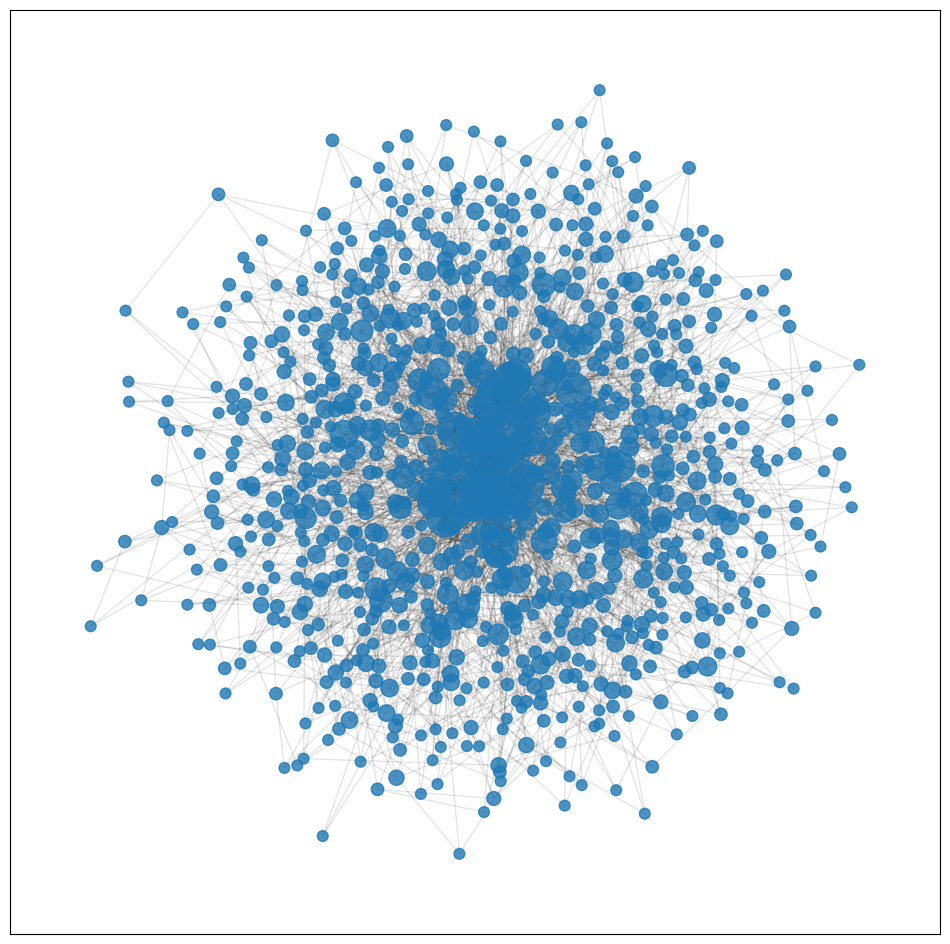

In [ ]:
G = create_graph(6, 900)
pos = nx.spring_layout(G, k=0.15, iterations=50)

# Draw nodes and edges
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_size=[v * 20 for v in dict(G.degree).values()], alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.1)

# Show the graph
plt.show()

### Problem 2

## A)
Simulate a pandemic without vaccination and Preferential attachment

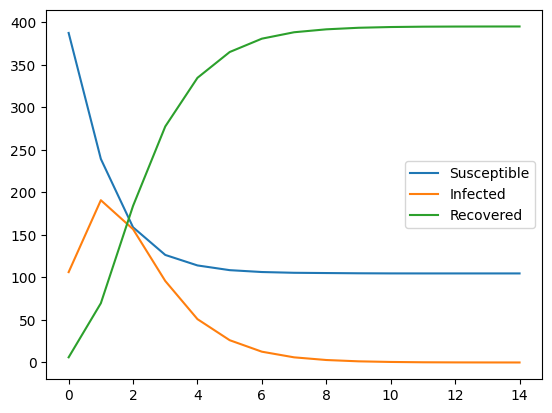

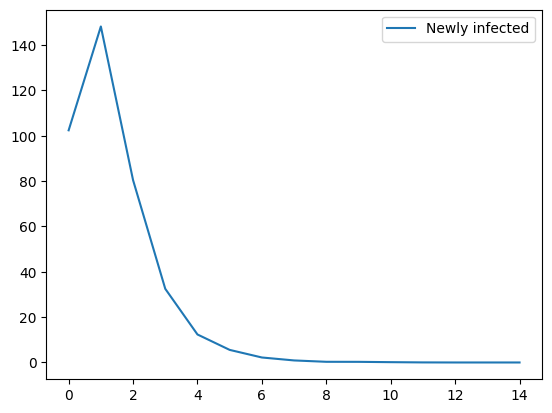

In [ ]:
total_count_states = None #total list of people levels in each state after designation number of iterations.
total_newly_infected = None #total list of newly Infected people after designation of number iterations.
iterations = 100  # Total number of iterations

for i in range(iterations):
    G = create_graph(6, 500)

    # Simulate the model to get current states and new infections
    count_states_i, newly_infected_i = model(G)

    # Convert to numpy arrays for easier processing
    count_states_i = np.array(count_states_i)
    newly_infected_i = np.array(newly_infected_i)

    # Accumulate results
    if total_count_states is None:
        total_count_states = count_states_i
        total_newly_infected = newly_infected_i
    else:
        total_count_states += count_states_i
        total_newly_infected += newly_infected_i
#calculate the mean after 100 steps.
total_count_states = total_count_states / 100
total_newly_infecteds = total_newly_infected / 100

plt.plot(total_count_states[:,0], label = "Susceptible")
plt.plot(total_count_states[:,1], label = "Infected")
plt.plot(total_count_states[:,2], label = "Recovered")
plt.legend()
plt.show()
plt.plot(total_newly_infecteds, label = "Newly infected")
plt.legend()
plt.show()

### problem 3

## A)
Simulate a pandemic with vaccination and Preferential attachment

In [ ]:
def vacModel(G, vac,initialInfected = 10 ,beta = 0.25, rho = 0.6):
    #Store the connection of nodes.
    w = nx.to_numpy_array(G)
    #To store newly_infected per week.
    newly_infecteds = [initialInfected]
    #To store number of each state per week.
    count_states = []
    #To store number vaccinated individuals per week.
    vaccinated_numbers = []
    states = np.zeros((len(G.nodes),2))
    #statrting with designated number Infected Individuals.
    startingInfected = np.random.choice(len(G.nodes),initialInfected, replace = False)
    for i in startingInfected:
        #putting the state of the infected people to 1 (which means they are infected.)
        states[i][0] = 1
    #Transform vaccination percentages from icremental to weekly.
    to_vac = []
    for i in range(len(vac)-1):
        if(i == 0):
            to_vac.append(vac[i])
        to_vac.append(vac[i+1] - vac[i])
    #keep track of unvaccinated people.
    unvaccinated_population  = np.arange(len(G.nodes))
    for i in range(15):
        newly_infected = 0
        #number of people to vaccinate based on percentage of the week.
        number_to_vaccinate = len(states) * to_vac[i] // 100
        #choose the people that will get vaccinated from unvaccinated people.
        to_vaccinate = np.random.choice(unvaccinated_population, number_to_vaccinate, replace = False)
        #update the unvaccinated people by removing the newly vaccinated ones.
        unvaccinated_population = np.setdiff1d(unvaccinated_population, to_vaccinate)
        for k in to_vaccinate:
            #update the state to vaccinated.
            states[k][1] = 1
        for j in range(len(G.nodes)):
            m = 0
            if states[j][0] == 1:
                #if infected see if they will recover.
                states[j][0] = np.random.choice([1,2], p = [1.0-rho,rho])
            if np.array_equal(states[j], [0, 0]):
                 #if susceptible see count the number of its infected neighbours and see if they will get infected.
                neighbours = [i for i, x in enumerate(w[j]) if x == 1]
                for neighbour in neighbours:
                    if np.array_equal(states[neighbour], [1, 0]):
                        m += 1
                states[j][0] = np.random.binomial(1, 1 - ((1 - beta) ** m))
                if states[j][0] == 1:
                    #if he gets infected count it.
                    newly_infected += 1
        #after each week store the number of newly infected.
        newly_infecteds.append(newly_infected)
        result_states = list(states[:,0])
        #after each week store the number of inidviduals in each state.
        count_state = [result_states.count(0), result_states.count(1), result_states.count(2)]
        count_states.append(count_state)
        vaccinated_numbers.append( list(states[:,1]).count(1))
    return count_states, newly_infecteds, vaccinated_numbers


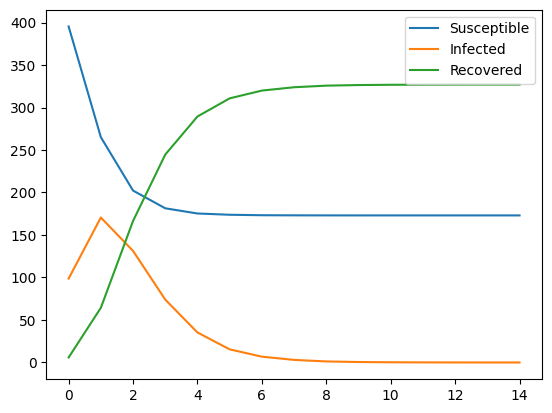

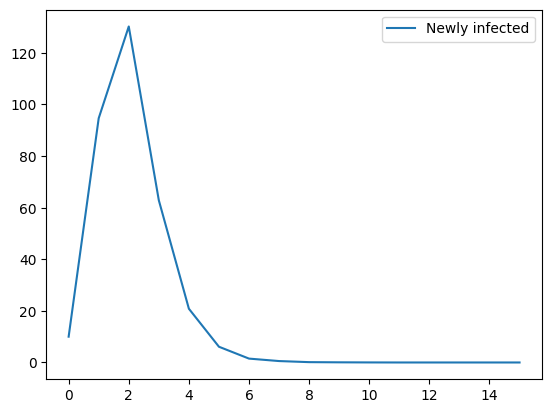

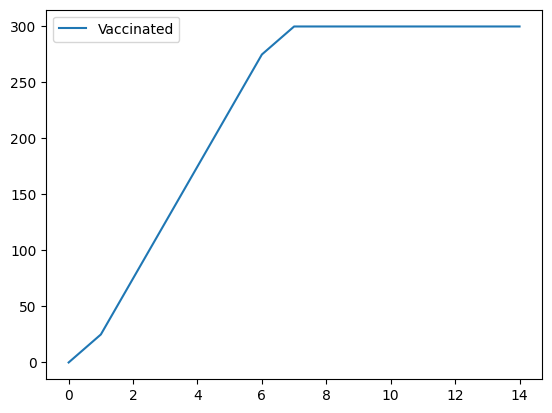

In [ ]:
total_count_states = None
total_newly_infected = None
iterations = 100  # Total number of iterations

for i in range(iterations):
    G = create_graph(6, 500)

    # Simulate the model to get current states and new infections
    count_states_i, newly_infected_i, vaccination = vacModel(G,  [0 ,5 ,15 ,25 ,35 ,45 ,55 ,60 ,60 ,60 ,60 ,60 ,60 ,60 ,60])

    # Convert to numpy arrays for easier processing
    count_states_i = np.array(count_states_i)
    newly_infected_i = np.array(newly_infected_i)

    # Accumulate results
    if total_count_states is None:
        total_count_states = count_states_i
        total_newly_infected = newly_infected_i
    else:
        total_count_states += count_states_i
        total_newly_infected += newly_infected_i

total_count_states = total_count_states / 100
total_newly_infecteds = total_newly_infected / 100

plt.plot(total_count_states[:,0], label = "Susceptible")
plt.plot(total_count_states[:,1], label = "Infected")
plt.plot(total_count_states[:,2], label = "Recovered")
plt.legend()
plt.show()
plt.plot(total_newly_infecteds, label = "Newly infected")
plt.legend()
plt.show()
plt.plot(vaccination, label = "Vaccinated")
plt.legend()
plt.show()

### Problem 4
## A)
The H1N1 pandemic in Sweden 2009


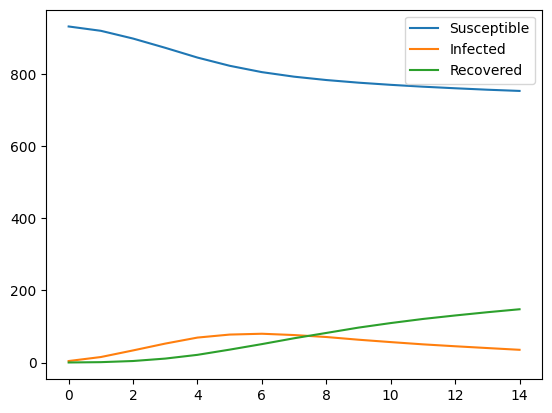

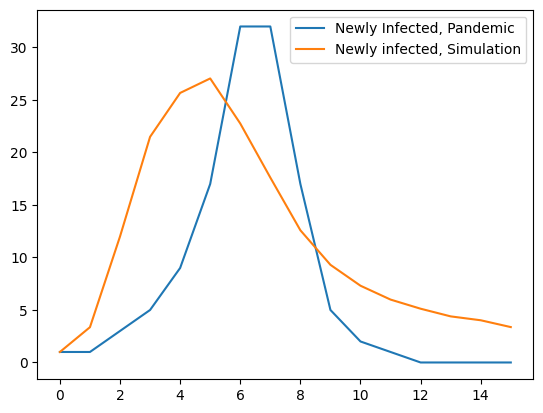

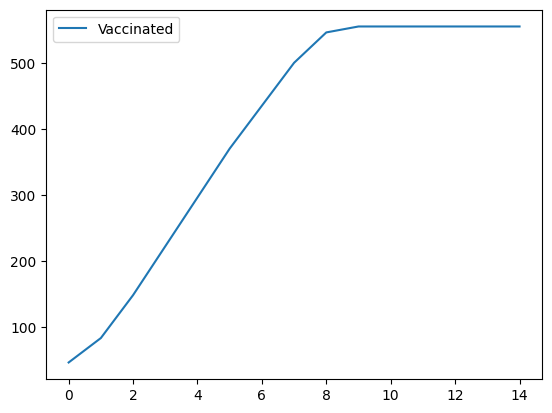

In [ ]:
total_count_states = None
total_newly_infected = None
iterations = 100  # Total number of iterations

for i in range(iterations):
    G = create_graph(9, 936)

    # Simulate the model to get current states and new infections
    count_states_i, newly_infected_i, vaccination = vacModel(G,  [5, 9, 16, 24, 32, 40, 47, 54, 59, 60, 60, 60, 60, 60, 60],1, 0.1, 0.20)

    # Convert to numpy arrays for easier processing
    count_states_i = np.array(count_states_i)
    newly_infected_i = np.array(newly_infected_i)

    # Accumulate results
    if total_count_states is None:
        total_count_states = count_states_i
        total_newly_infected = newly_infected_i
    else:
        total_count_states += count_states_i
        total_newly_infected += newly_infected_i

total_count_states = total_count_states / 100
total_newly_infecteds = total_newly_infected / 100

plt.plot(total_count_states[:,0], label = "Susceptible")
plt.plot(total_count_states[:,1], label = "Infected")
plt.plot(total_count_states[:,2], label = "Recovered")
plt.legend()
plt.show()
plt.plot([1, 1, 3, 5, 9, 17, 32, 32, 17, 5, 2, 1, 0, 0, 0, 0], label = "Newly Infected, Pandemic")
plt.plot(total_newly_infecteds, label = "Newly infected, Simulation")
plt.legend()
plt.show()
plt.plot(vaccination, label = "Vaccinated")
plt.legend()
plt.show()

## B)
estimate the average degree of k and the disease -spread parameters for the pandemic

Trying combo: (0.1, 0.25, 8)


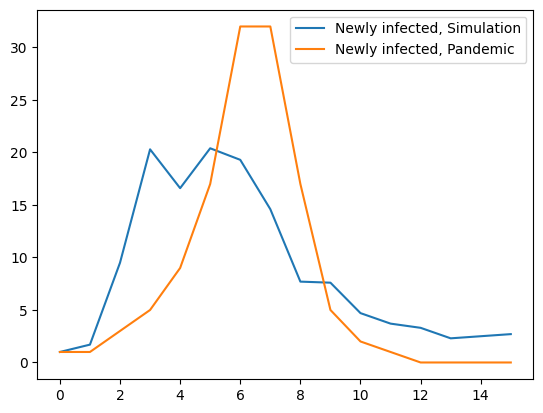

Trying combo: (0.1, 0.25, 9)


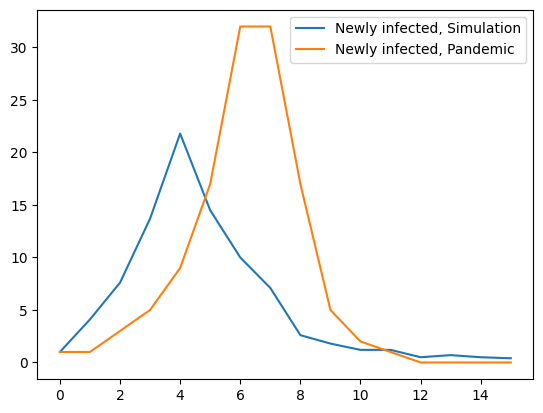

Trying combo: (0.1, 0.25, 10)


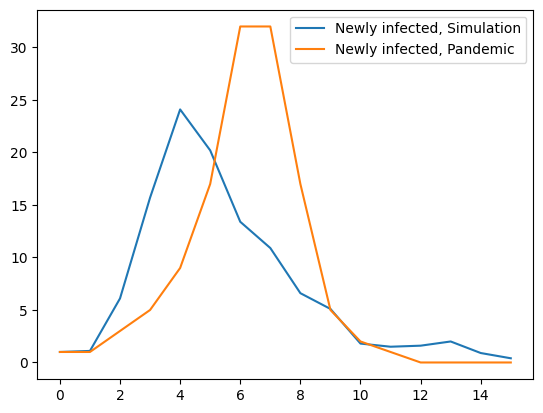

Trying combo: (0.1, 0.3, 8)


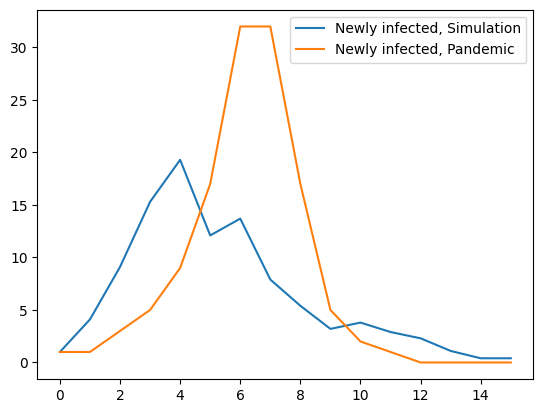

Trying combo: (0.1, 0.3, 9)


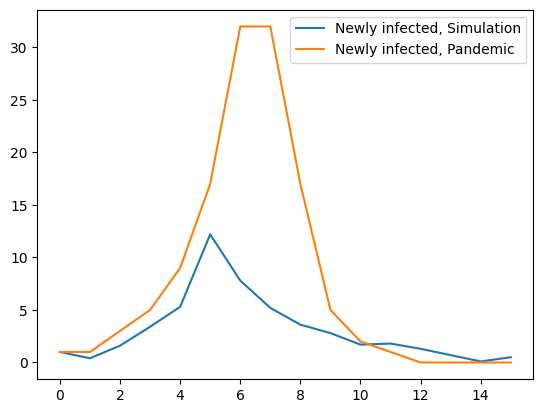

Trying combo: (0.1, 0.3, 10)


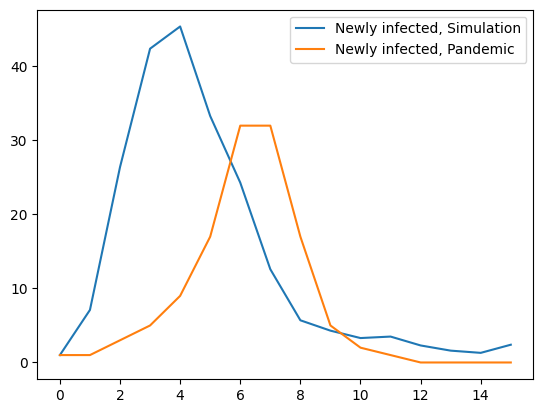

Trying combo: (0.1, 0.35, 8)


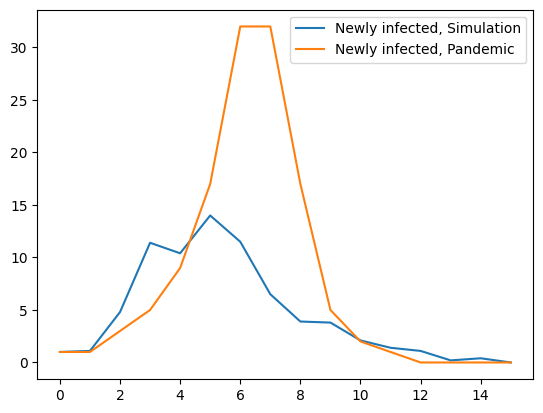

Trying combo: (0.1, 0.35, 9)


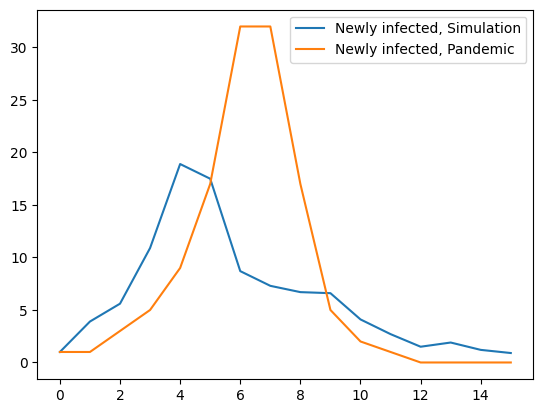

Trying combo: (0.1, 0.35, 10)


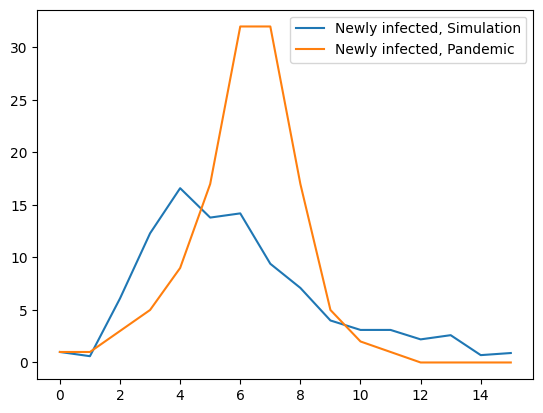

current parameters: 0.1 0.25 8
current error: 7.696387139431072
Trying combo: (0.1, 0.2, 7)


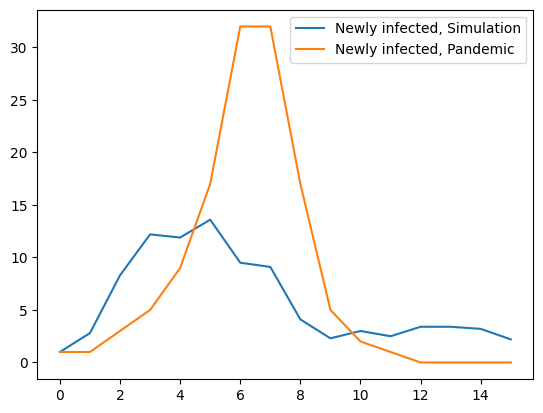

Trying combo: (0.1, 0.2, 8)


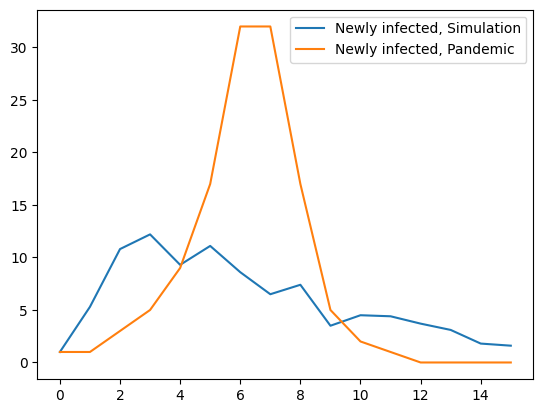

Trying combo: (0.1, 0.2, 9)


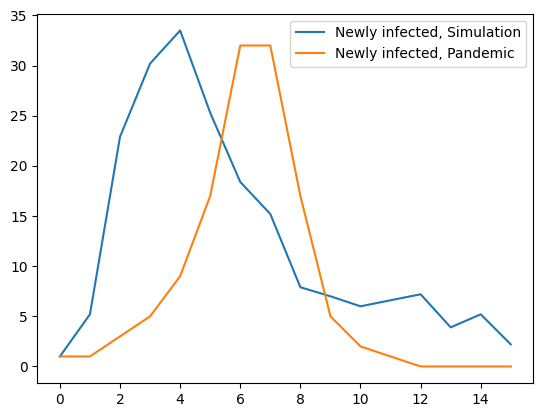

Trying combo: (0.1, 0.25, 7)


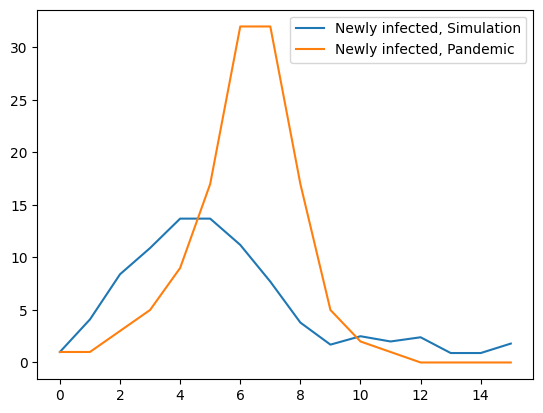

Trying combo: (0.1, 0.25, 8)


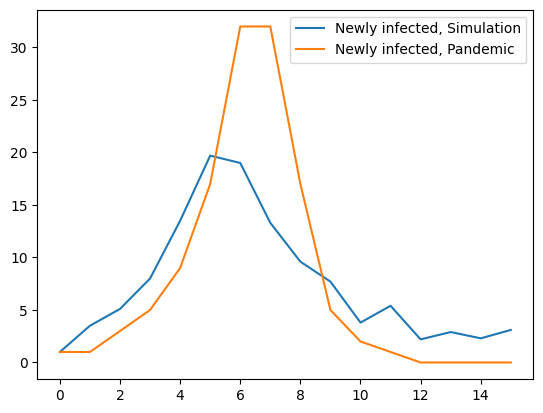

Trying combo: (0.1, 0.25, 9)


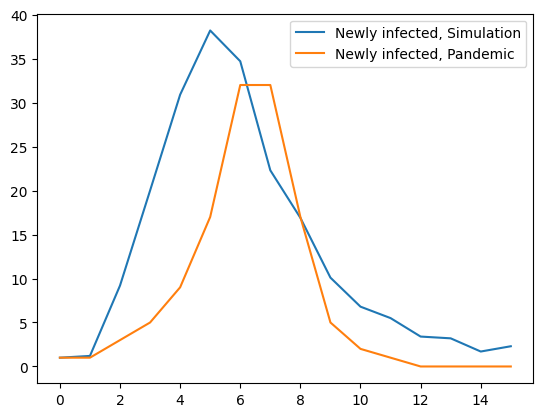

Trying combo: (0.1, 0.3, 7)


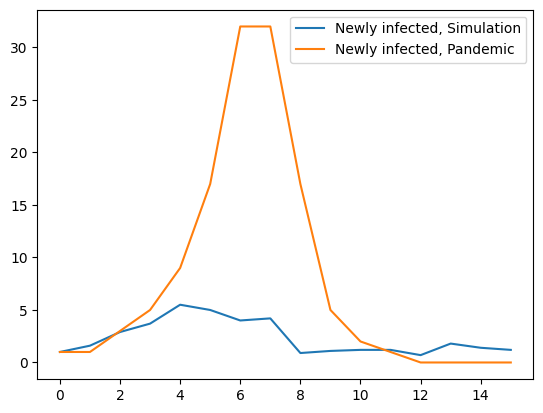

Trying combo: (0.1, 0.3, 8)


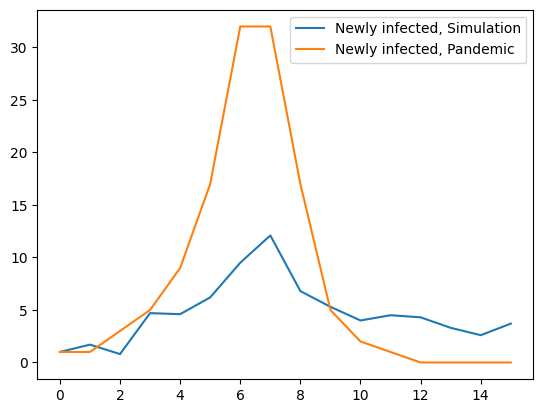

Trying combo: (0.1, 0.3, 9)


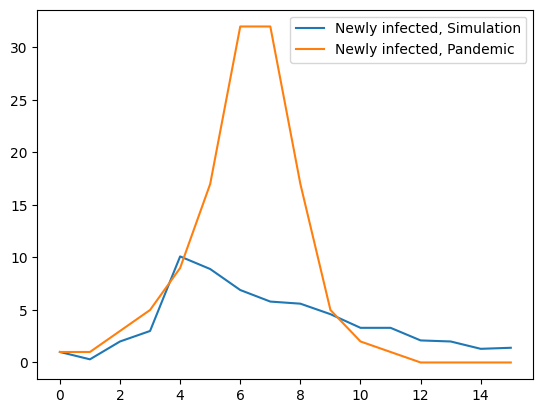

current parameters: 0.1 0.25 8
current error: 6.512919852109344
Trying combo: (0.1, 0.2, 7)


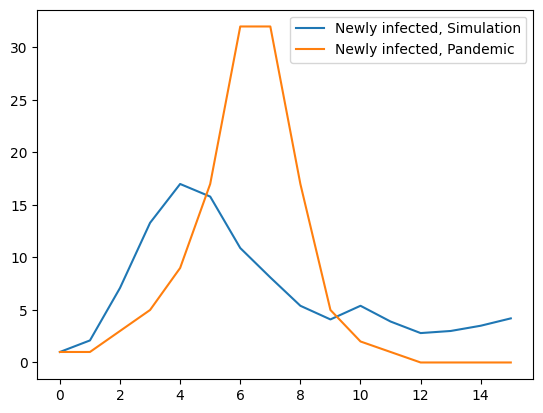

Trying combo: (0.1, 0.2, 8)


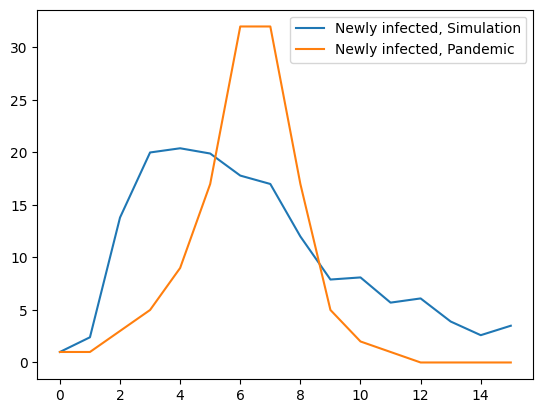

Trying combo: (0.1, 0.2, 9)


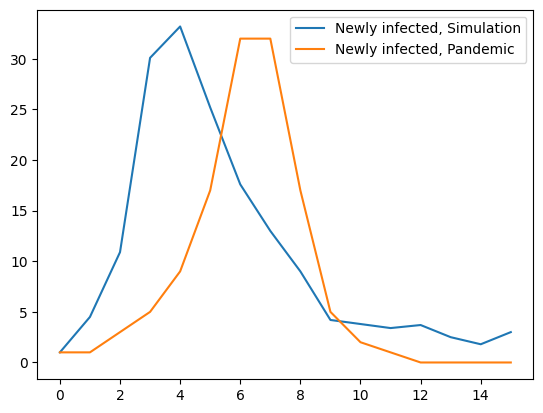

Trying combo: (0.1, 0.25, 7)


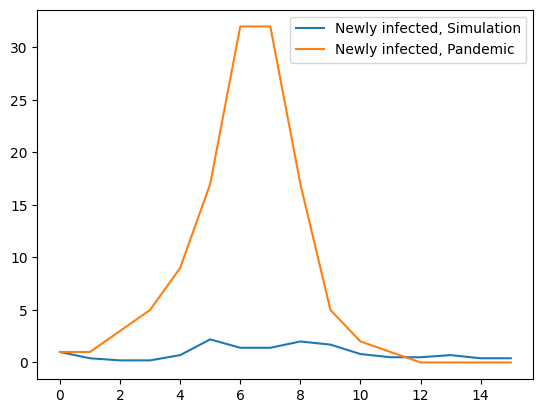

Trying combo: (0.1, 0.25, 8)


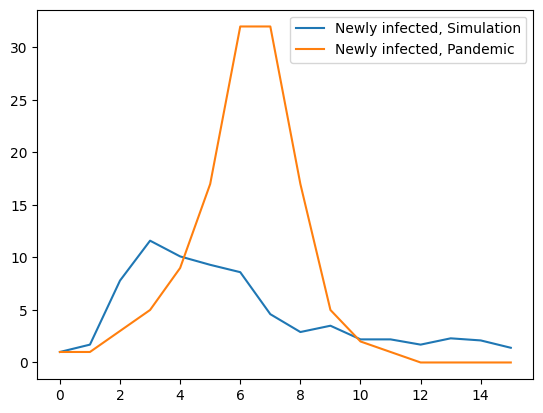

Trying combo: (0.1, 0.25, 9)


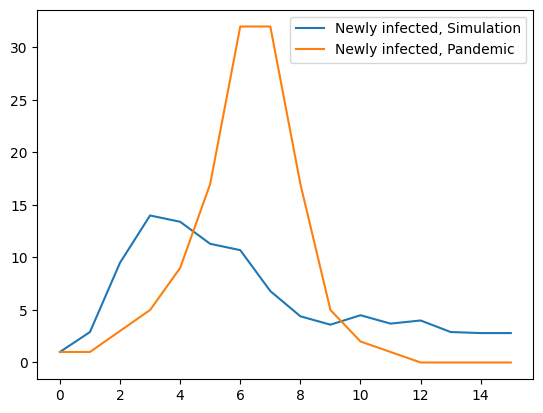

Trying combo: (0.1, 0.3, 7)


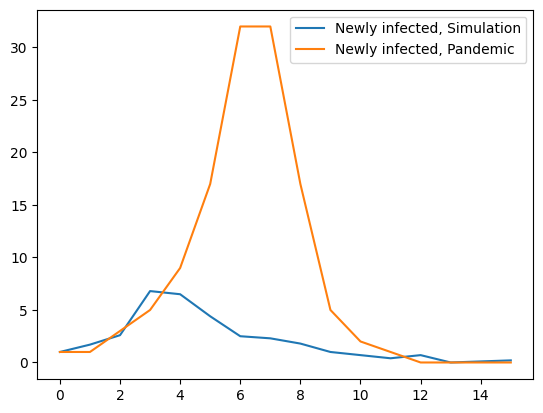

Trying combo: (0.1, 0.3, 8)


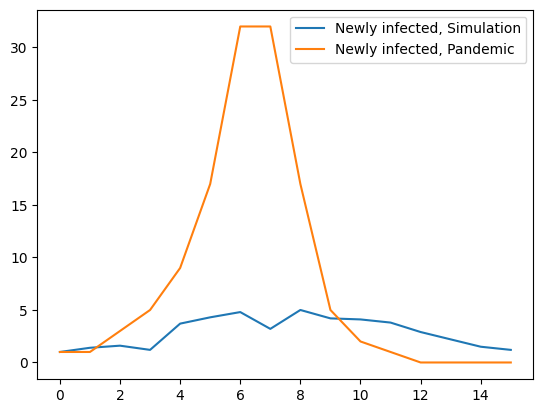

Trying combo: (0.1, 0.3, 9)


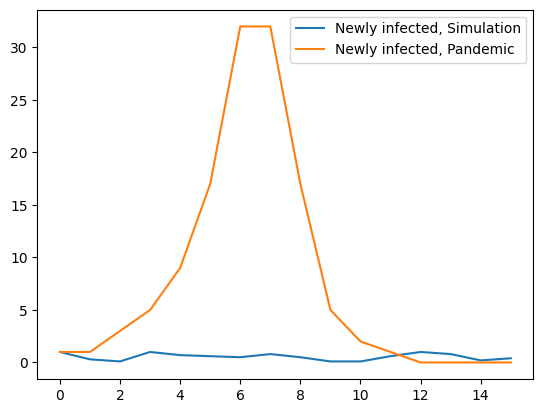

current parameters: 0.1 0.2 8
current error: 8.18821561758116
Trying combo: (0.1, 0.15000000000000002, 7)


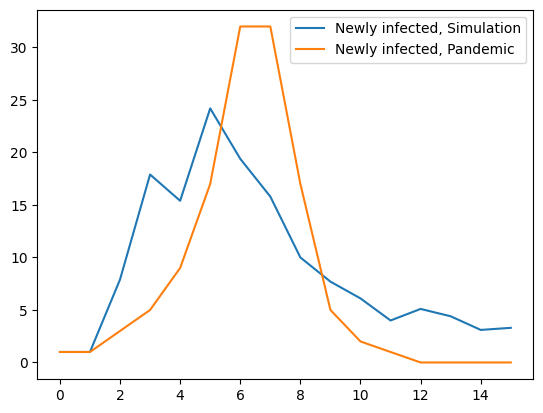

Trying combo: (0.1, 0.15000000000000002, 8)


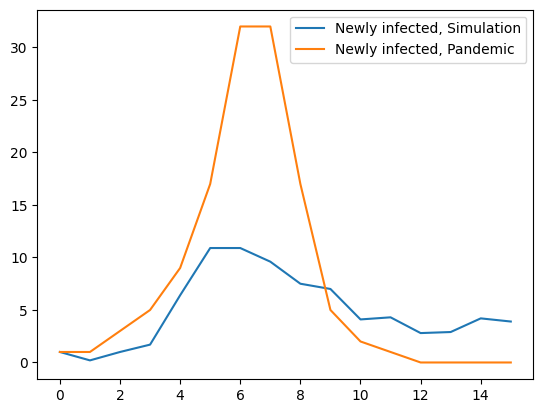

Trying combo: (0.1, 0.15000000000000002, 9)


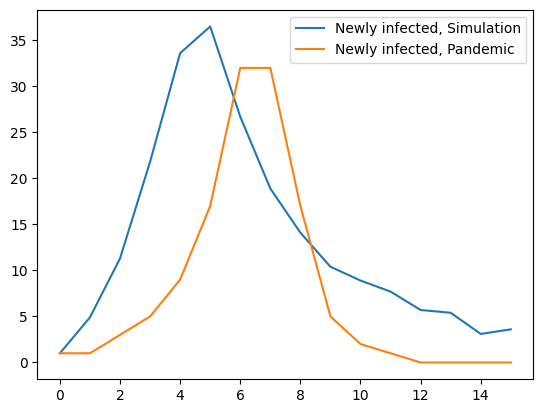

Trying combo: (0.1, 0.2, 7)


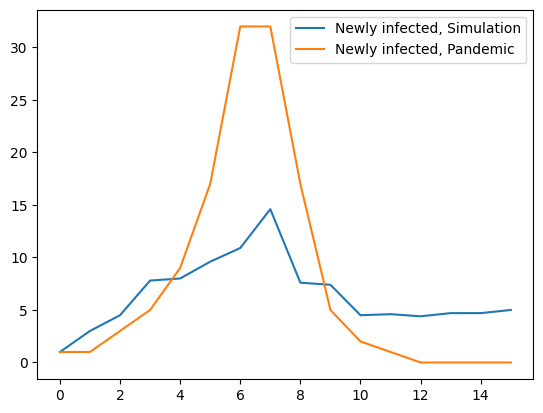

Trying combo: (0.1, 0.2, 8)


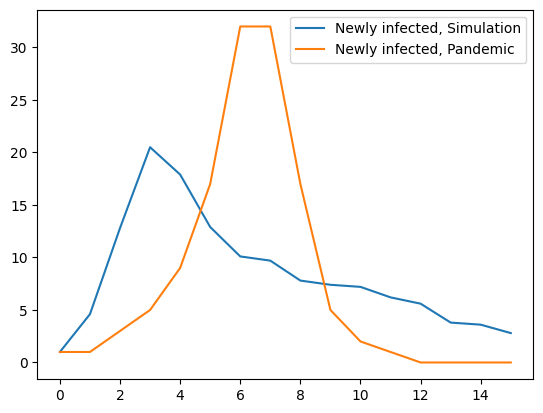

Trying combo: (0.1, 0.2, 9)


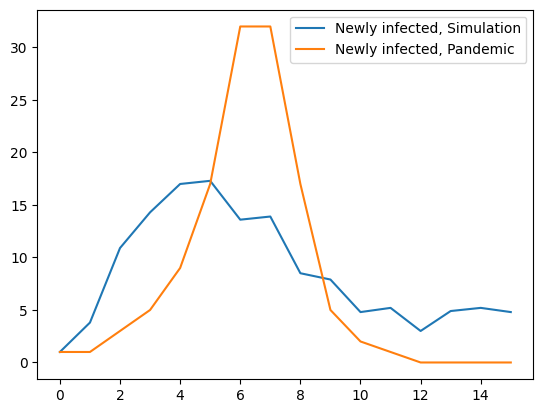

Trying combo: (0.1, 0.25, 7)


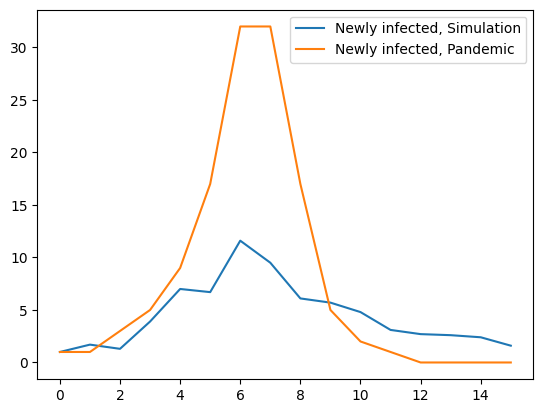

Trying combo: (0.1, 0.25, 8)


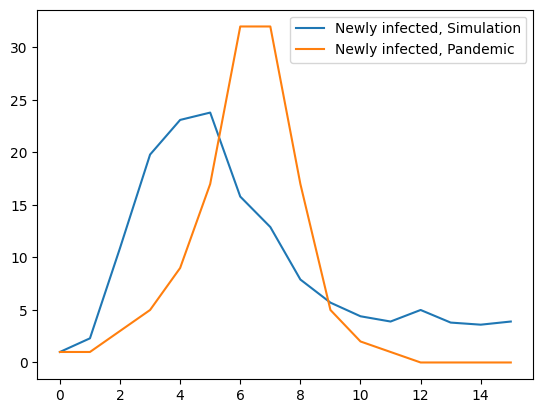

Trying combo: (0.1, 0.25, 9)


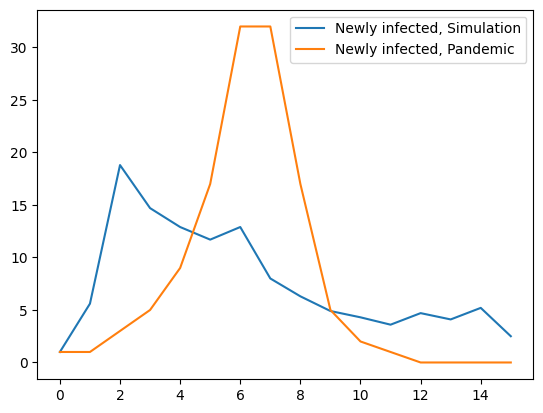

current parameters: 0.1 0.15000000000000002 7
current error: 7.2989297160611155
Trying combo: (0.1, 0.10000000000000002, 6)


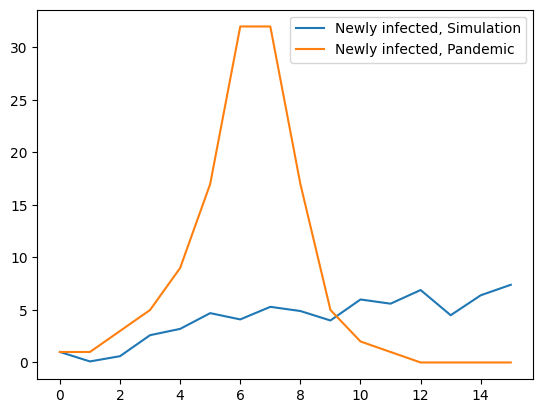

Trying combo: (0.1, 0.10000000000000002, 7)


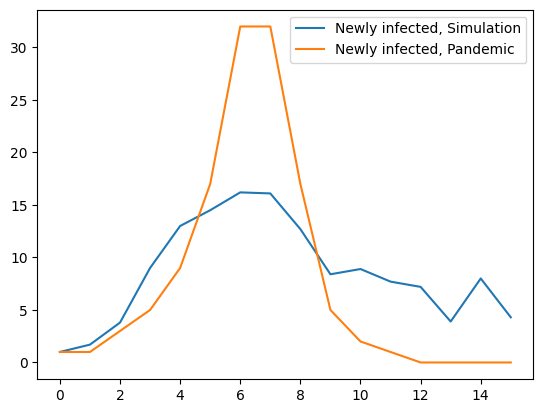

Trying combo: (0.1, 0.10000000000000002, 8)


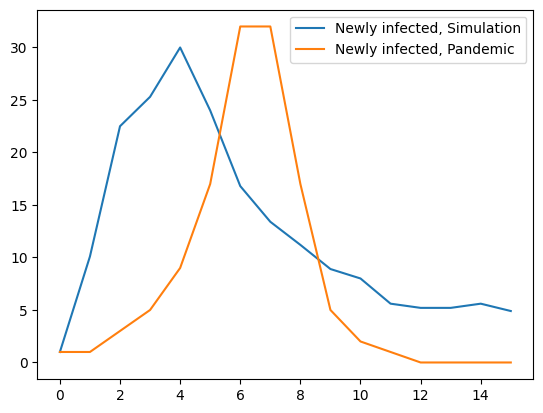

Trying combo: (0.1, 0.15000000000000002, 6)


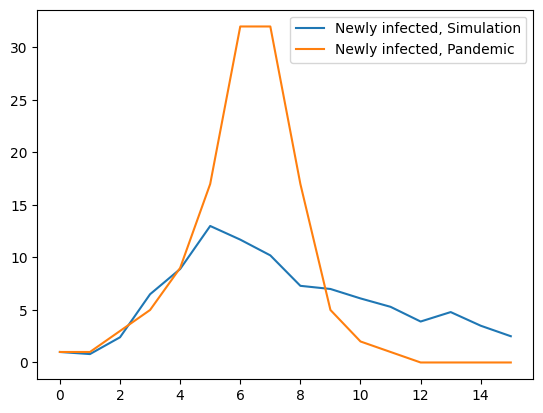

Trying combo: (0.1, 0.15000000000000002, 7)


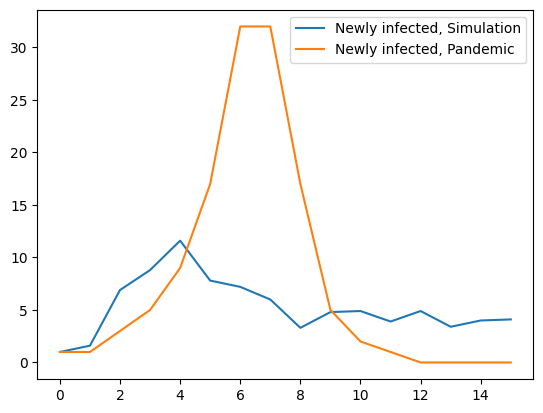

Trying combo: (0.1, 0.15000000000000002, 8)


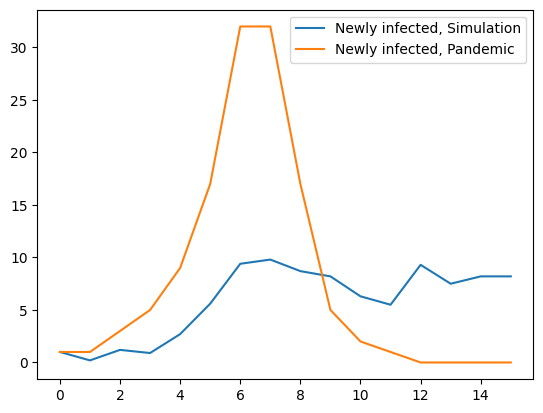

Trying combo: (0.1, 0.2, 6)


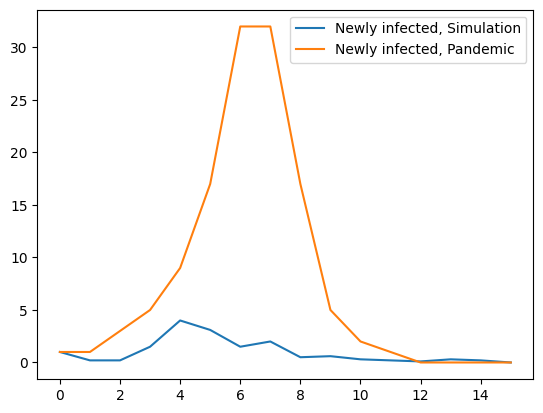

Trying combo: (0.1, 0.2, 7)


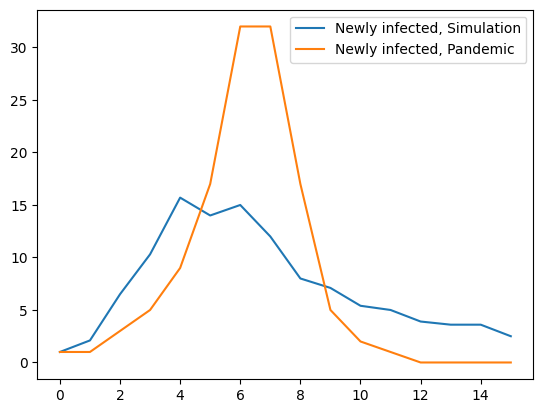

Trying combo: (0.1, 0.2, 8)


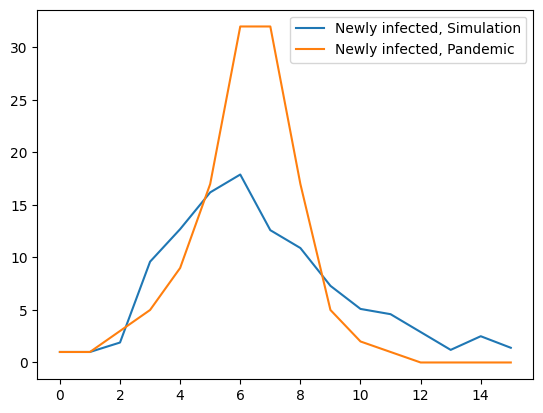

current parameters: 0.1 0.2 8
current error: 6.590713163232033
Trying combo: (0.1, 0.15000000000000002, 7)


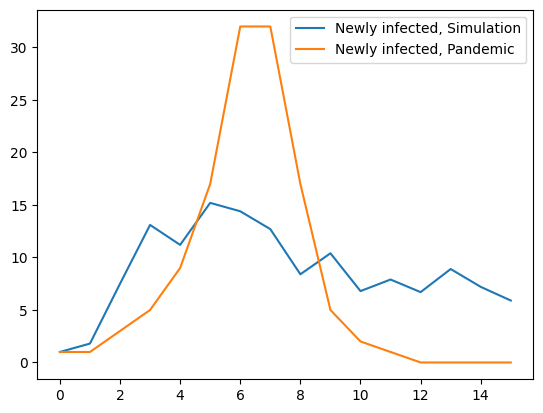

Trying combo: (0.1, 0.15000000000000002, 8)


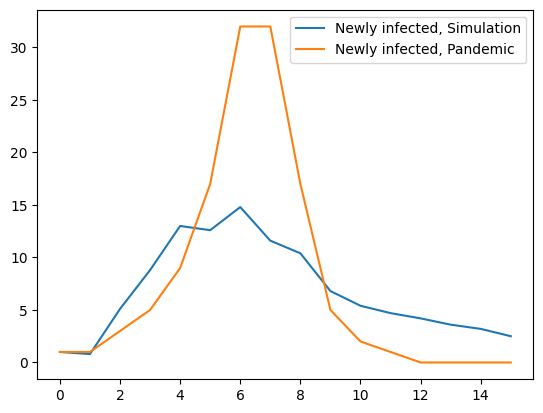

Trying combo: (0.1, 0.15000000000000002, 9)


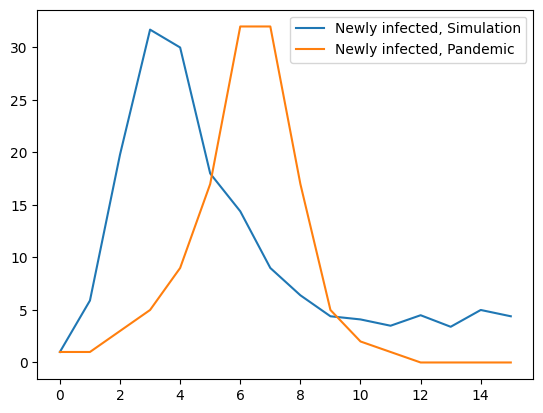

Trying combo: (0.1, 0.2, 7)


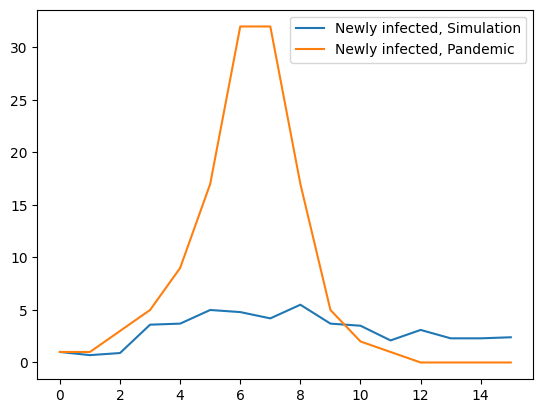

Trying combo: (0.1, 0.2, 8)


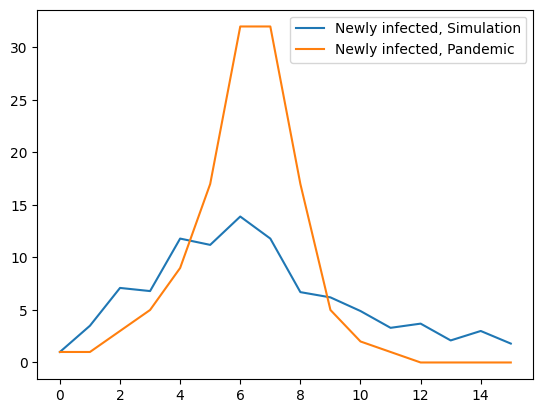

Trying combo: (0.1, 0.2, 9)


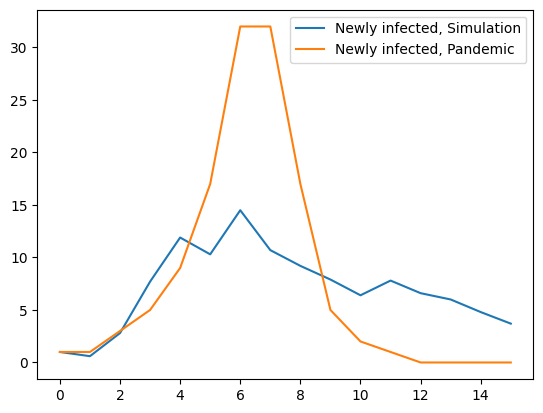

Trying combo: (0.1, 0.25, 7)


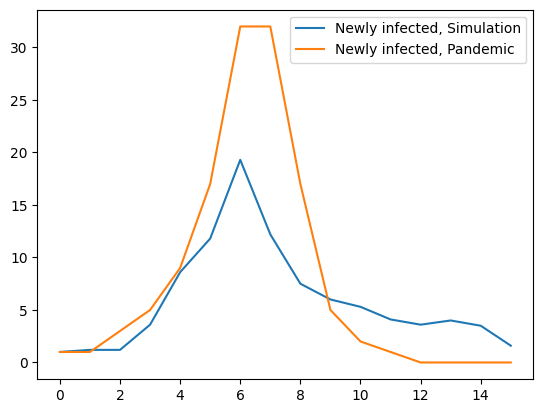

Trying combo: (0.1, 0.25, 8)


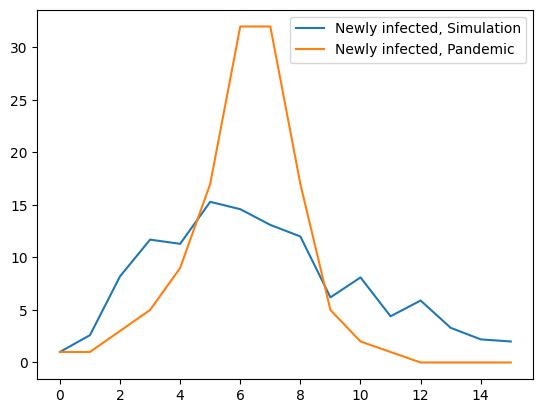

Trying combo: (0.1, 0.25, 9)


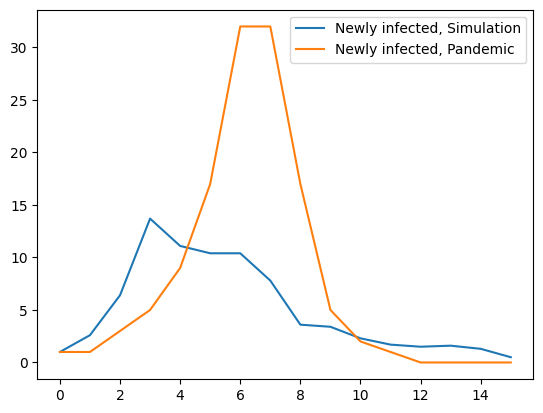

current parameters: 0.1 0.25 7
current error: 6.806660341165849
Trying combo: (0.1, 0.2, 6)


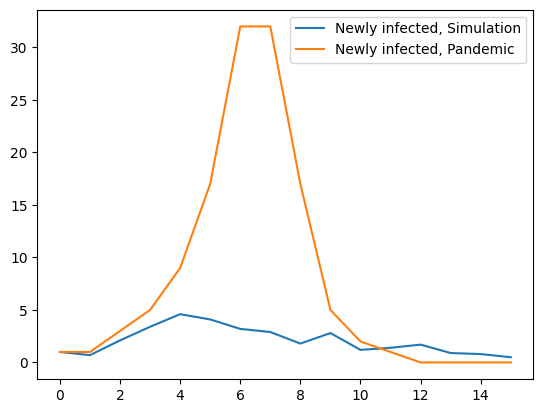

Trying combo: (0.1, 0.2, 7)


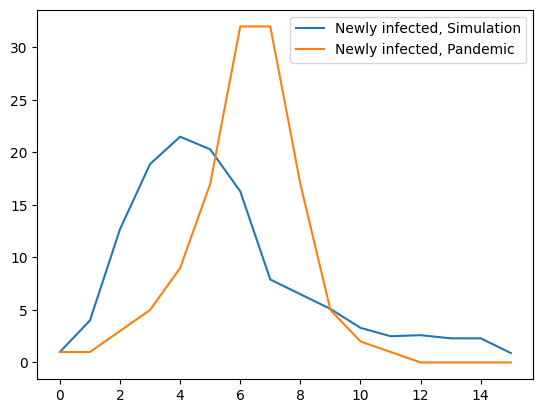

Trying combo: (0.1, 0.2, 8)


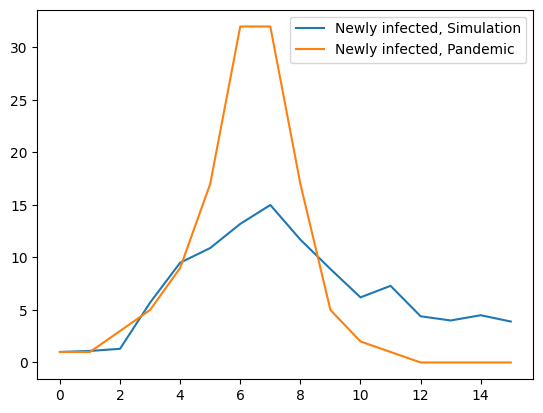

Trying combo: (0.1, 0.25, 6)


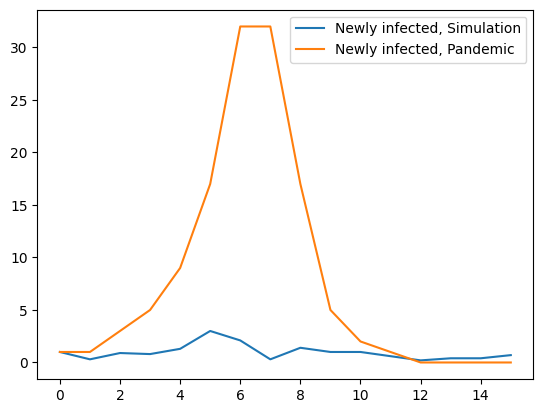

Trying combo: (0.1, 0.25, 7)


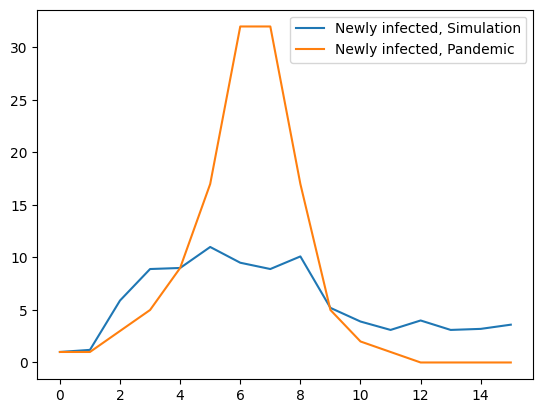

Trying combo: (0.1, 0.25, 8)


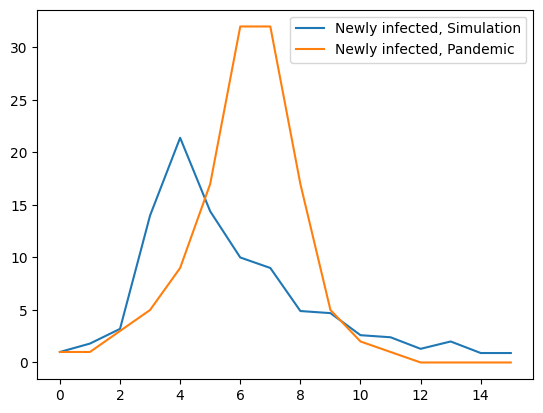

Trying combo: (0.1, 0.3, 6)


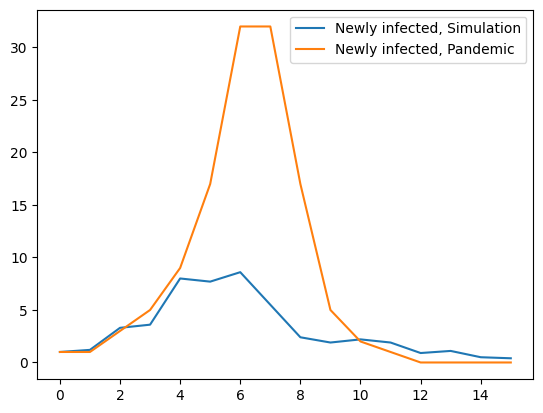

Trying combo: (0.1, 0.3, 7)


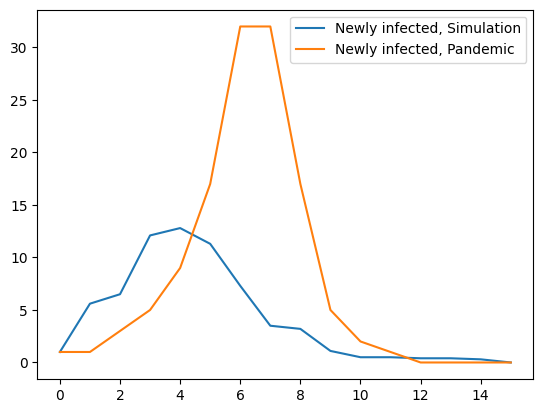

Trying combo: (0.1, 0.3, 8)


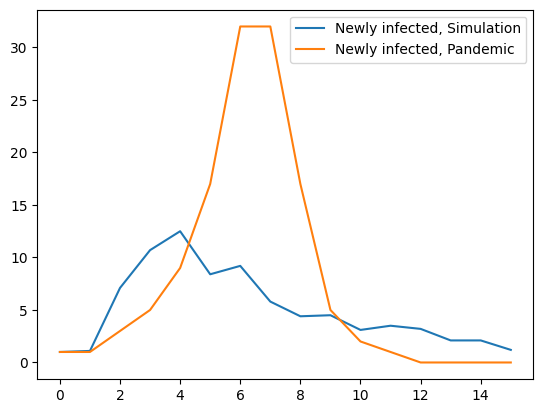

current parameters: 0.1 0.2 8
current error: 7.308984197547564
Trying combo: (0.1, 0.15000000000000002, 7)


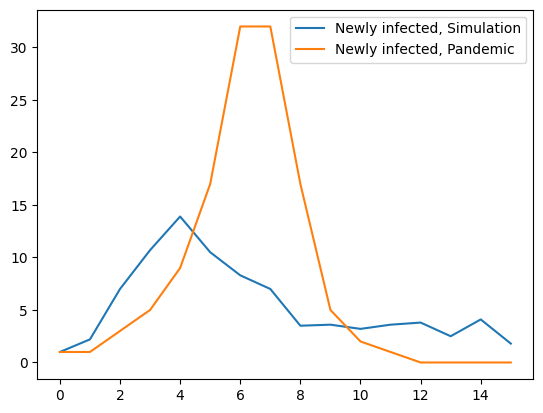

Trying combo: (0.1, 0.15000000000000002, 8)


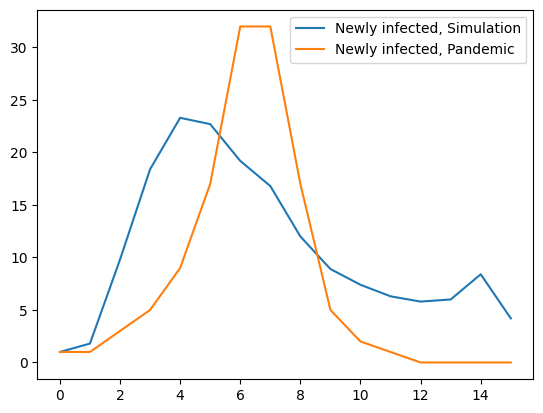

Trying combo: (0.1, 0.15000000000000002, 9)


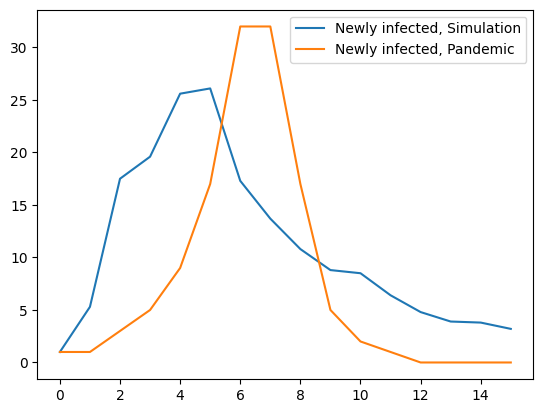

Trying combo: (0.1, 0.2, 7)


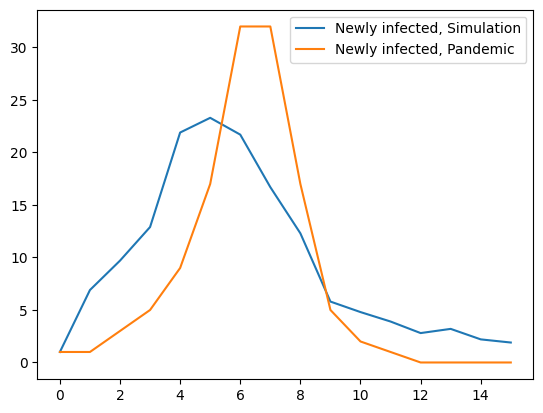

Trying combo: (0.1, 0.2, 8)


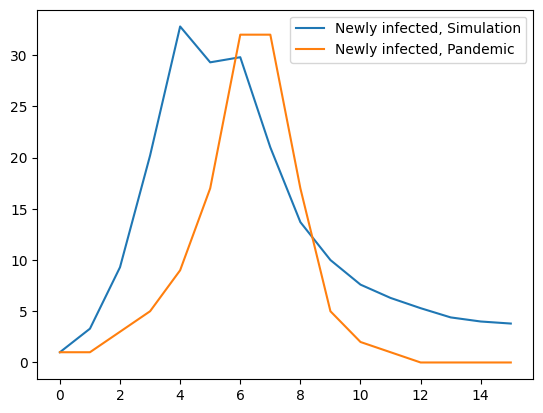

Trying combo: (0.1, 0.2, 9)


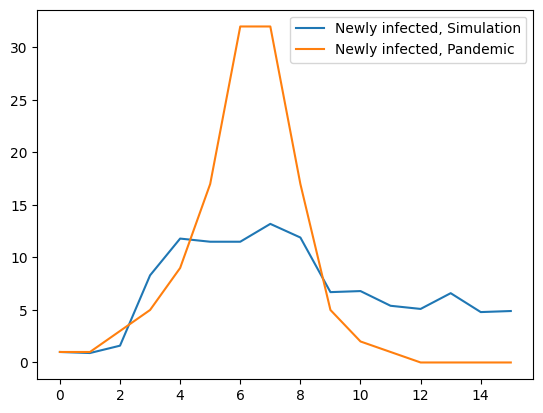

Trying combo: (0.1, 0.25, 7)


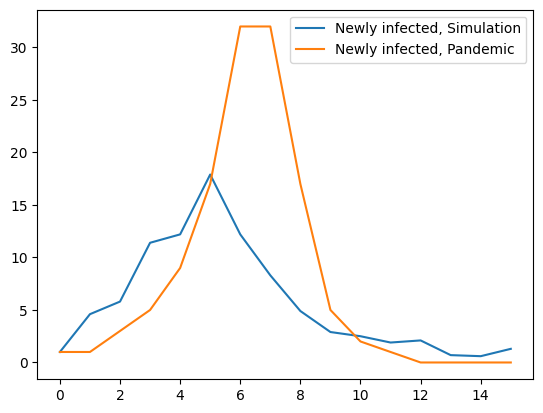

Trying combo: (0.1, 0.25, 8)


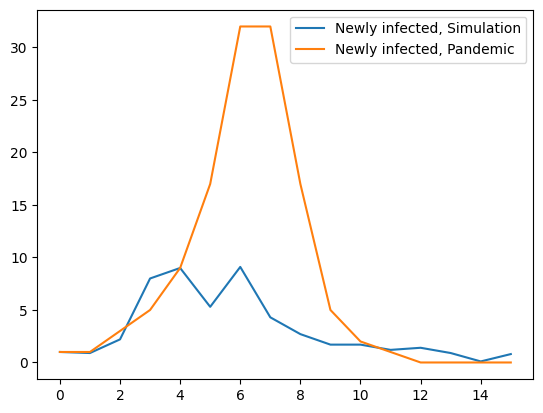

Trying combo: (0.1, 0.25, 9)


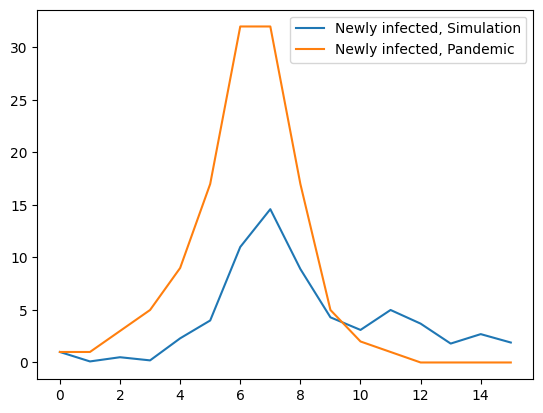

current parameters: 0.1 0.2 7
current error: 6.864309870627928
Trying combo: (0.1, 0.15000000000000002, 6)


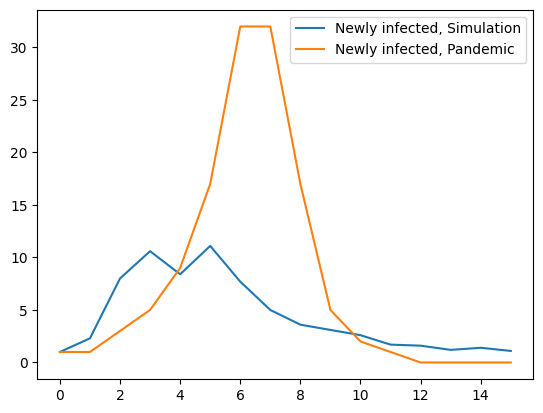

Trying combo: (0.1, 0.15000000000000002, 7)


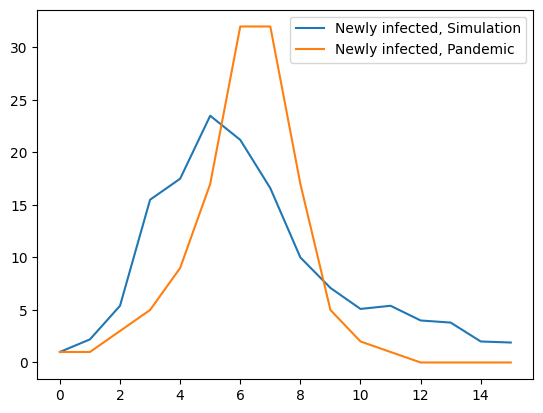

Trying combo: (0.1, 0.15000000000000002, 8)


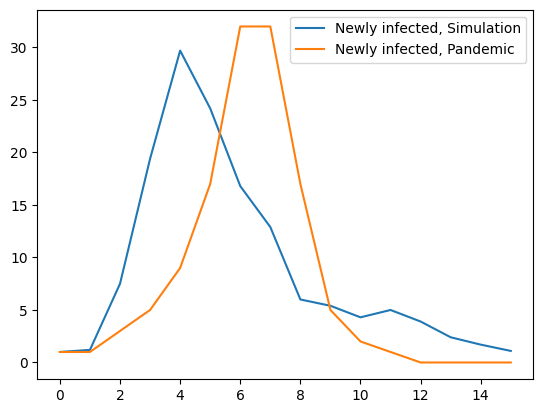

Trying combo: (0.1, 0.2, 6)


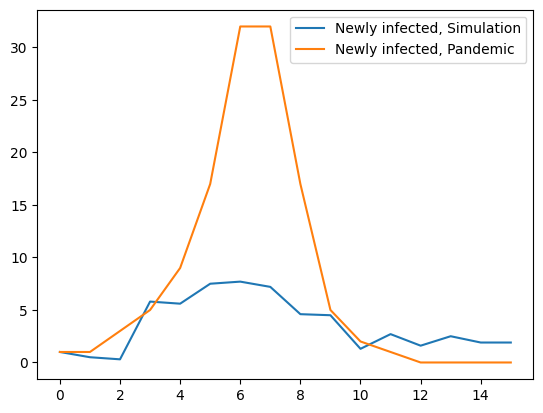

Trying combo: (0.1, 0.2, 7)


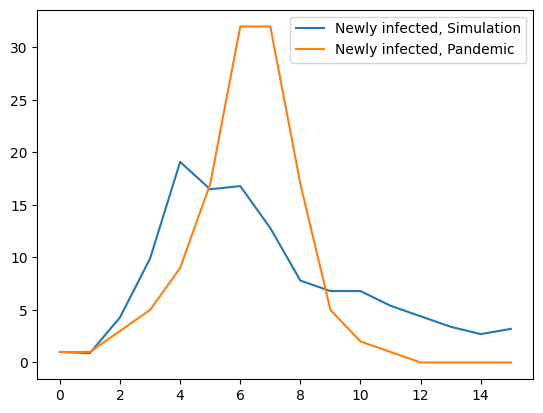

Trying combo: (0.1, 0.2, 8)


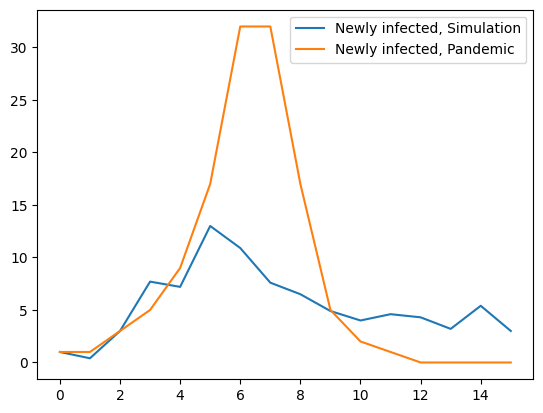

Trying combo: (0.1, 0.25, 6)


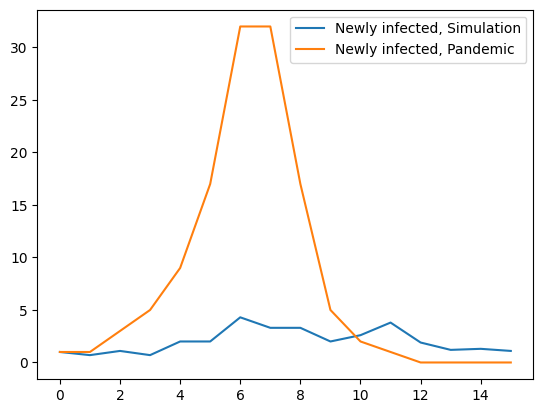

Trying combo: (0.1, 0.25, 7)


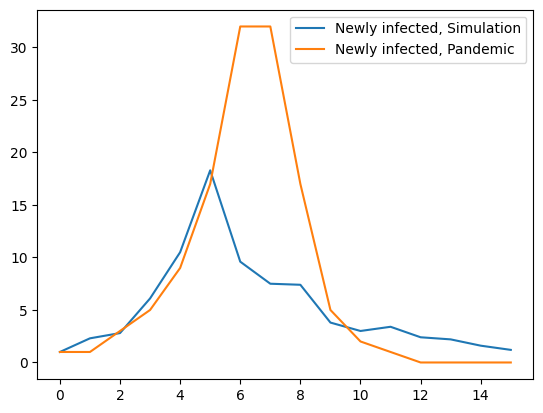

Trying combo: (0.1, 0.25, 8)


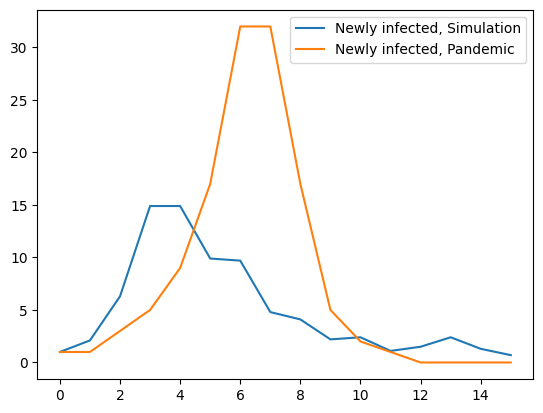

current parameters: 0.1 0.15000000000000002 7
current error: 6.643511872496353
Trying combo: (0.1, 0.10000000000000002, 6)


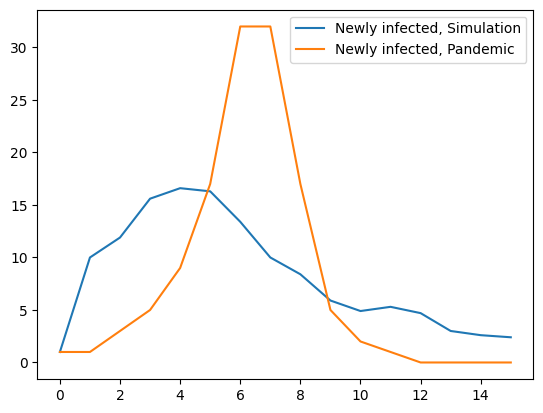

Trying combo: (0.1, 0.10000000000000002, 7)


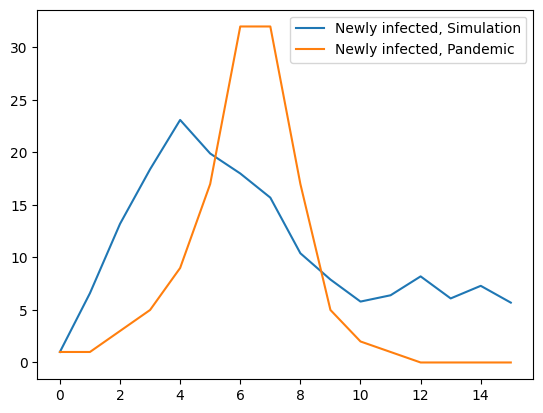

Trying combo: (0.1, 0.10000000000000002, 8)


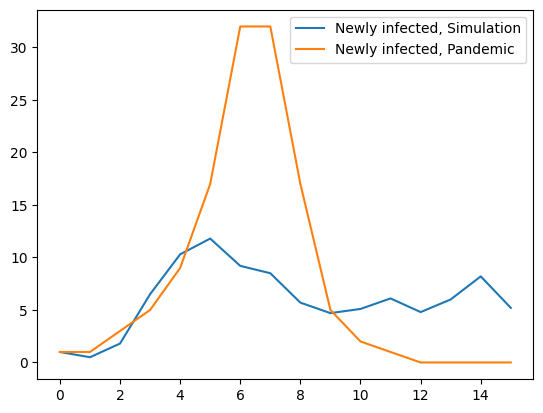

Trying combo: (0.1, 0.15000000000000002, 6)


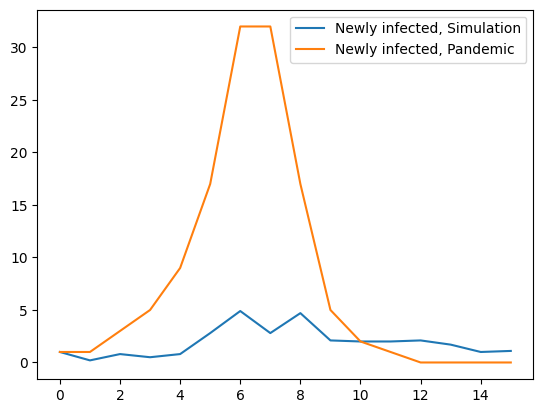

Trying combo: (0.1, 0.15000000000000002, 7)


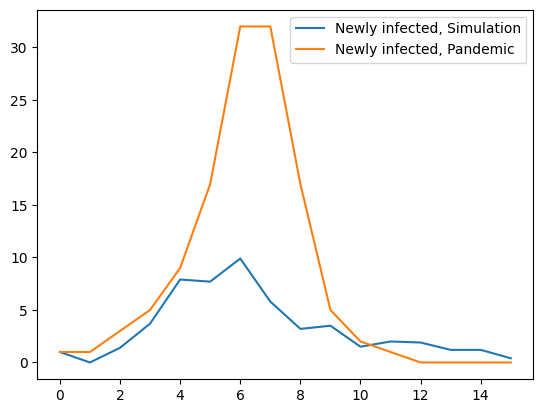

Trying combo: (0.1, 0.15000000000000002, 8)


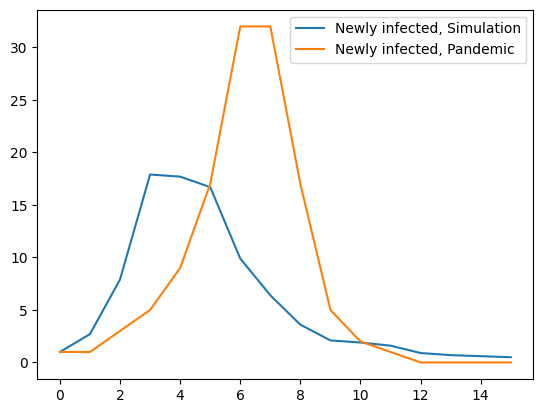

Trying combo: (0.1, 0.2, 6)


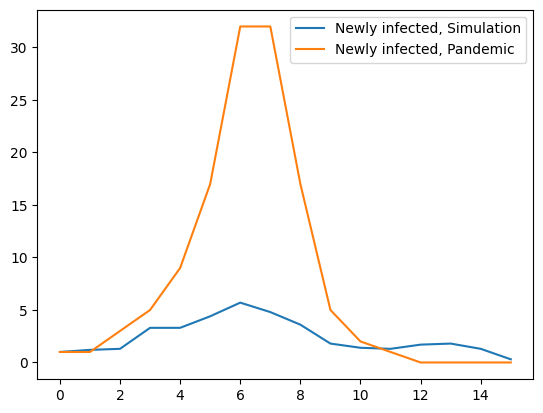

Trying combo: (0.1, 0.2, 7)


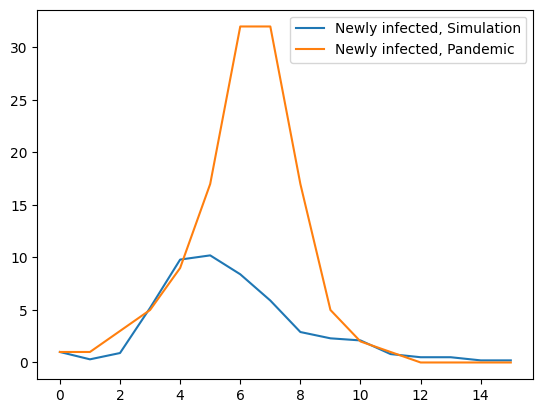

Trying combo: (0.1, 0.2, 8)


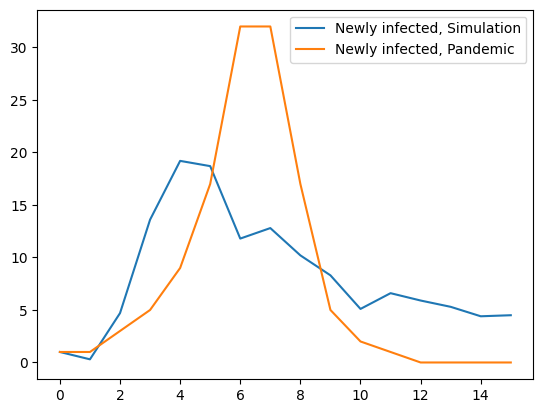

current parameters: 0.1 0.2 8
current error: 8.52041665647872
Trying combo: (0.1, 0.15000000000000002, 7)


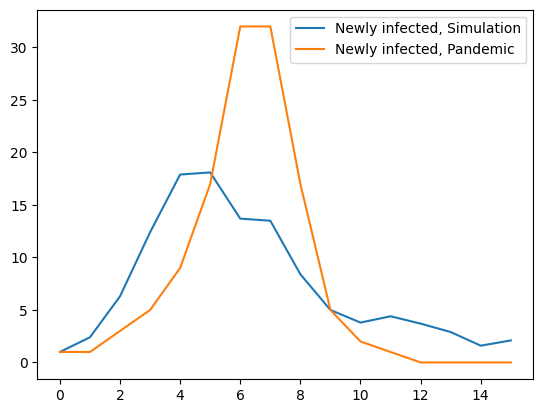

Trying combo: (0.1, 0.15000000000000002, 8)


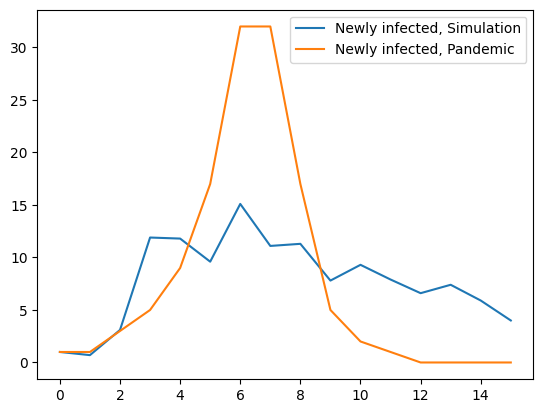

Trying combo: (0.1, 0.15000000000000002, 9)


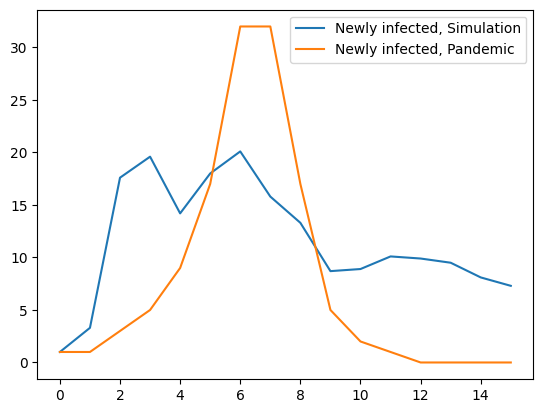

Trying combo: (0.1, 0.2, 7)


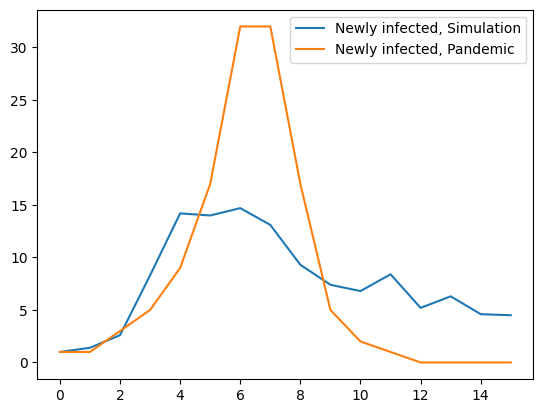

Trying combo: (0.1, 0.2, 8)


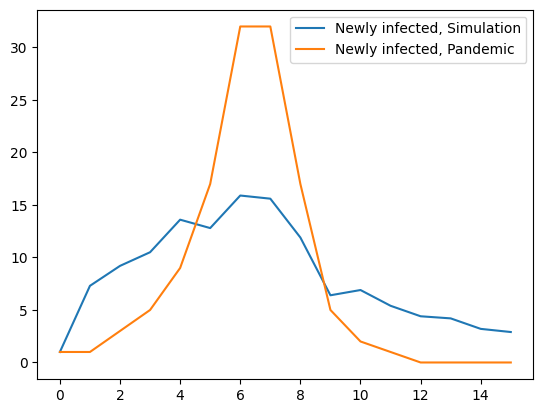

Trying combo: (0.1, 0.2, 9)


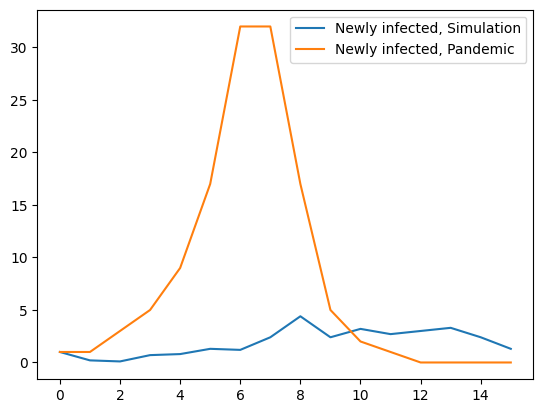

Trying combo: (0.1, 0.25, 7)


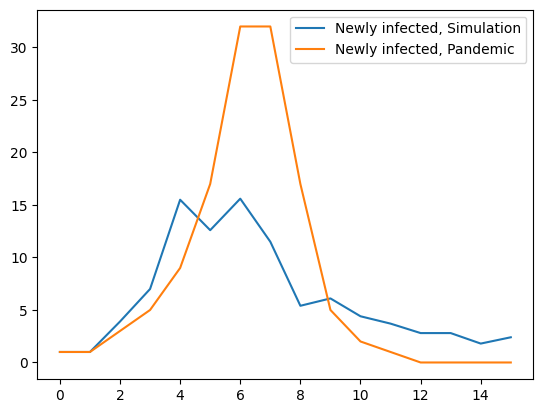

Trying combo: (0.1, 0.25, 8)


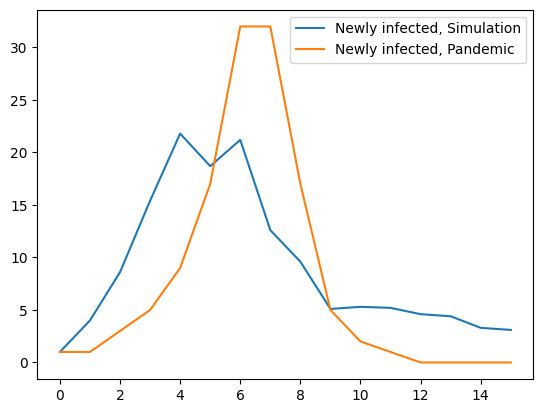

Trying combo: (0.1, 0.25, 9)


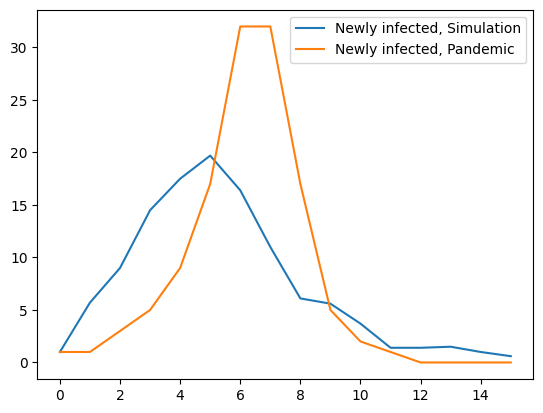

current parameters: 0.1 0.2 8
current error: 7.081401697404265
Trying combo: (0.1, 0.15000000000000002, 7)


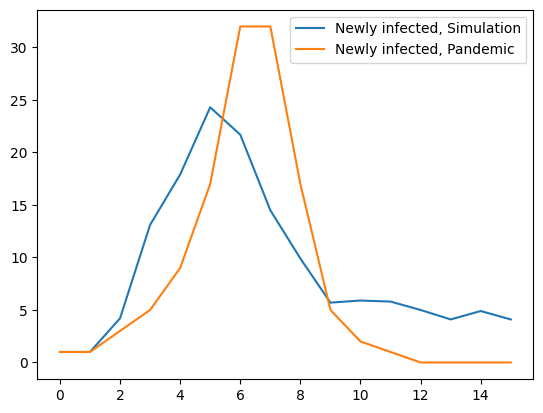

Trying combo: (0.1, 0.15000000000000002, 8)


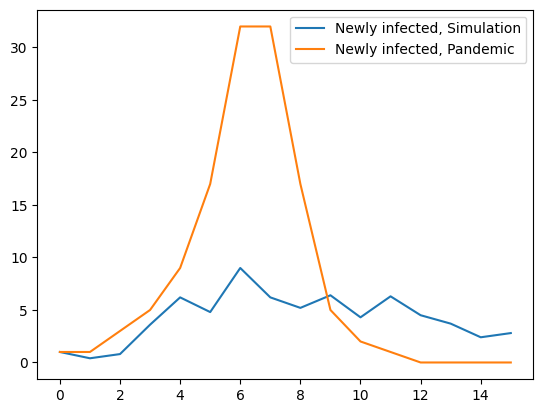

Trying combo: (0.1, 0.15000000000000002, 9)


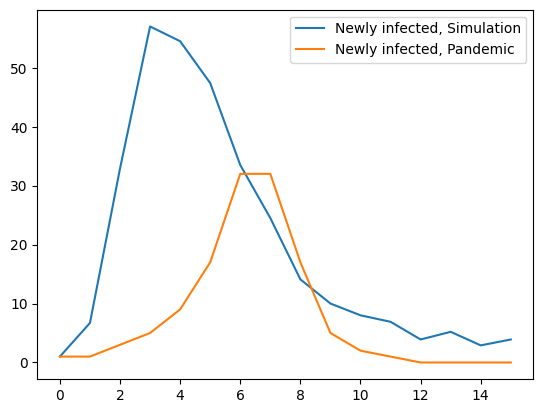

Trying combo: (0.1, 0.2, 7)


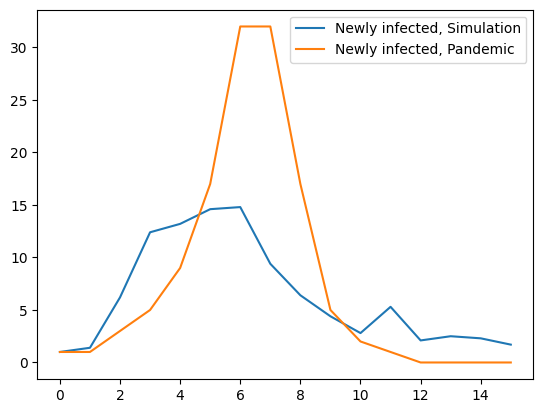

Trying combo: (0.1, 0.2, 8)


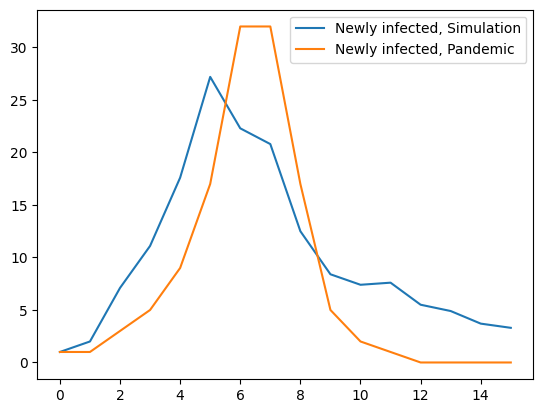

Trying combo: (0.1, 0.2, 9)


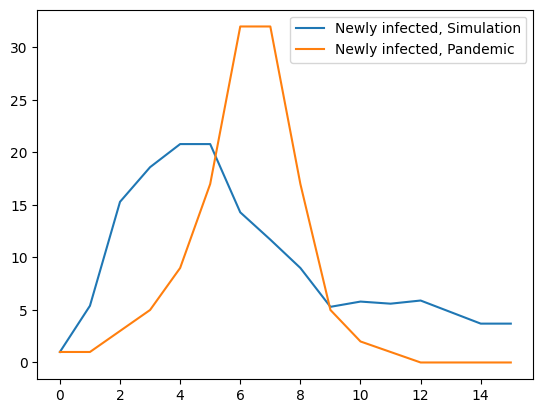

Trying combo: (0.1, 0.25, 7)


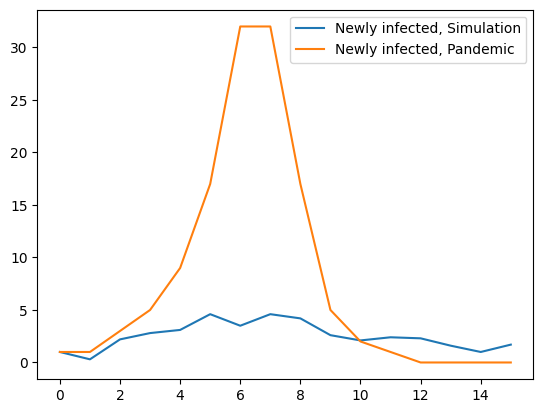

Trying combo: (0.1, 0.25, 8)


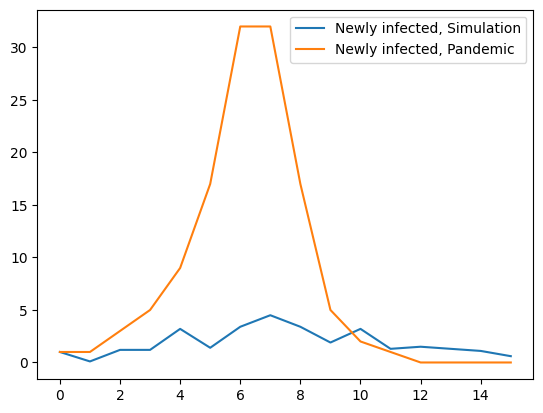

Trying combo: (0.1, 0.25, 9)


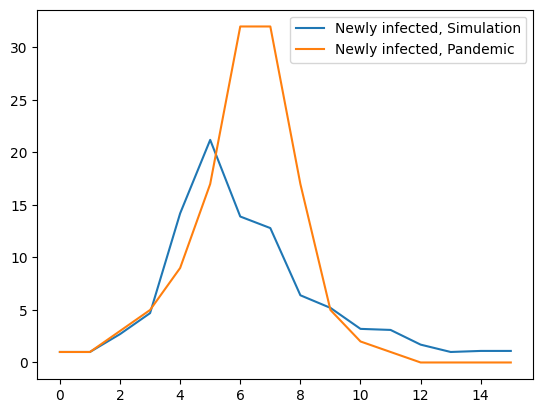

current parameters: 0.1 0.2 8
current error: 6.304363568196238
Trying combo: (0.1, 0.15000000000000002, 7)


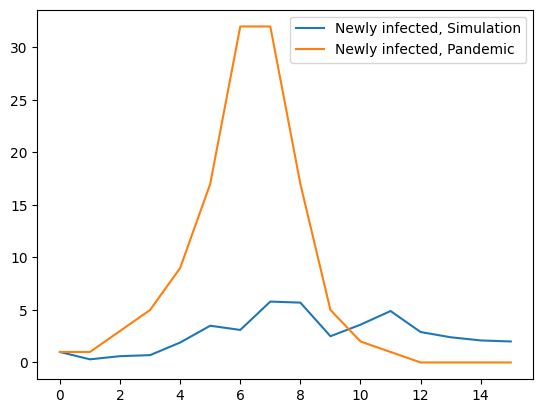

Trying combo: (0.1, 0.15000000000000002, 8)


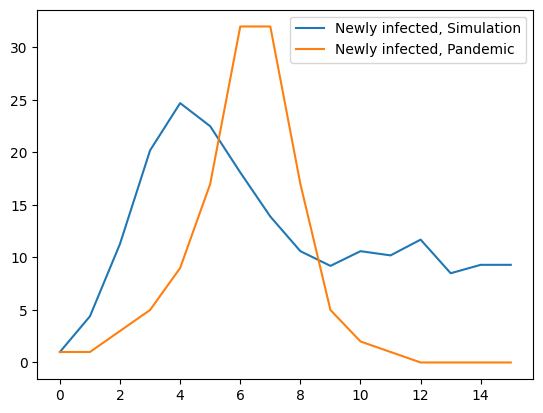

Trying combo: (0.1, 0.15000000000000002, 9)


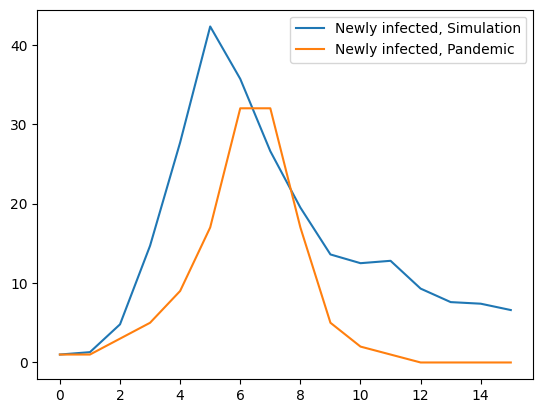

Trying combo: (0.1, 0.2, 7)


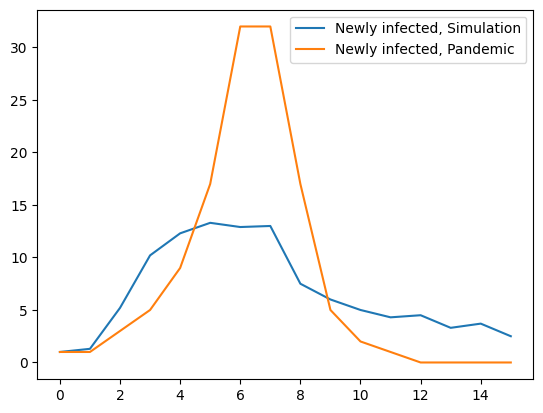

Trying combo: (0.1, 0.2, 8)


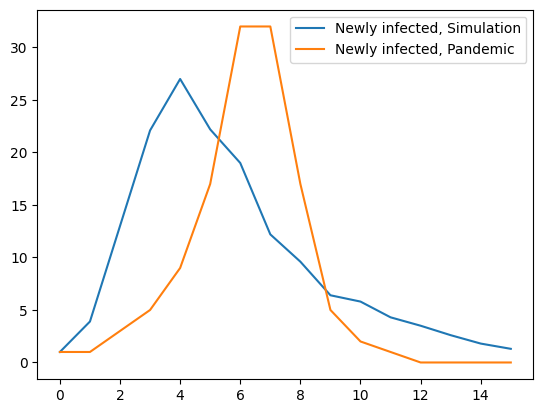

Trying combo: (0.1, 0.2, 9)


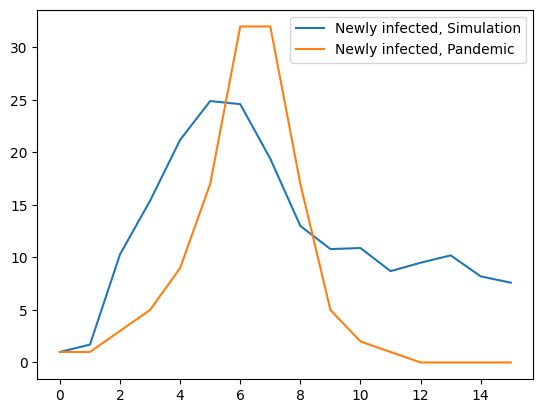

Trying combo: (0.1, 0.25, 7)


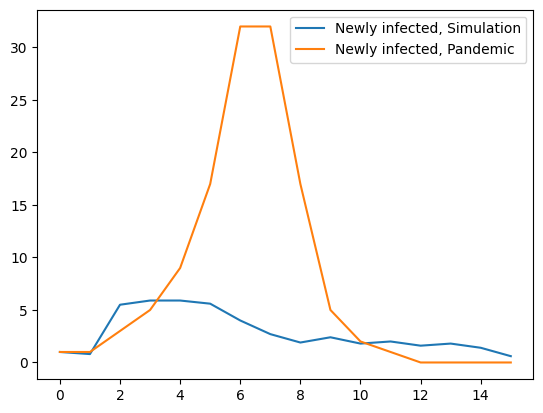

Trying combo: (0.1, 0.25, 8)


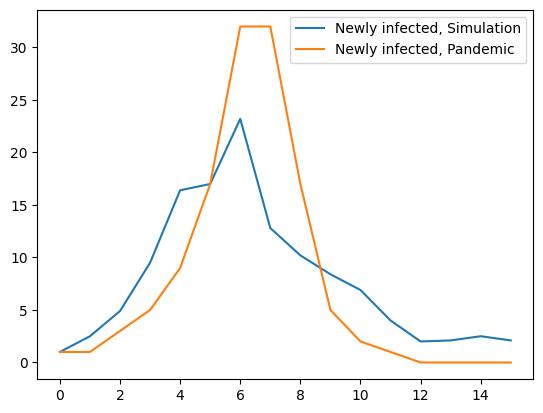

Trying combo: (0.1, 0.25, 9)


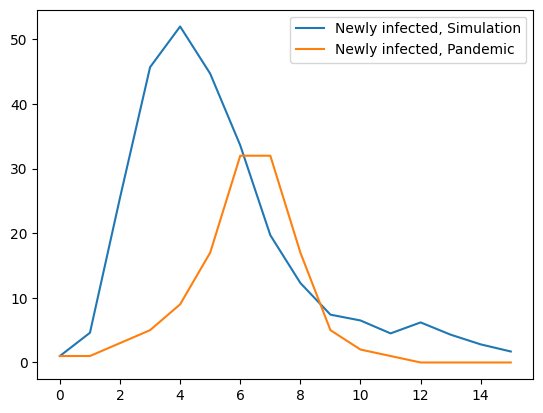

current parameters: 0.1 0.25 8
current error: 6.308872720225064
Trying combo: (0.1, 0.2, 7)


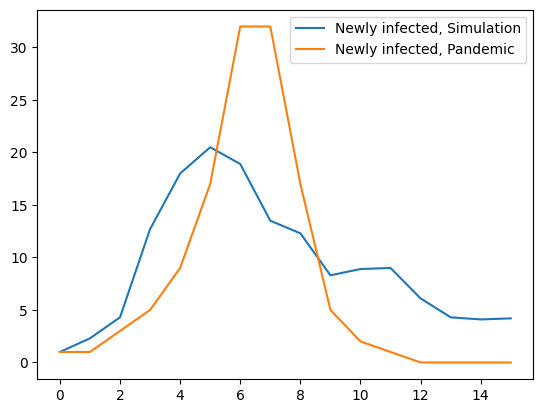

Trying combo: (0.1, 0.2, 8)


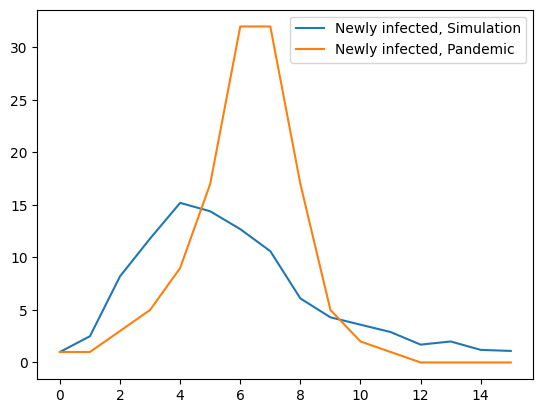

Trying combo: (0.1, 0.2, 9)


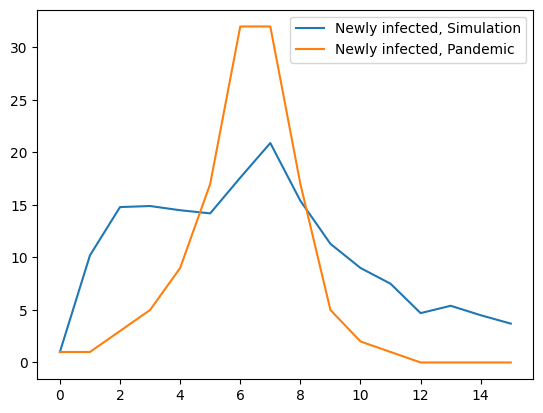

Trying combo: (0.1, 0.25, 7)


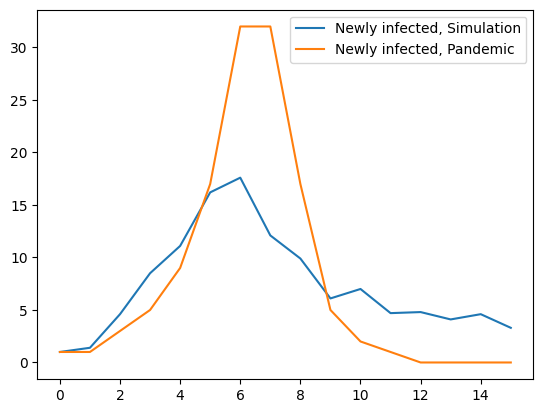

Trying combo: (0.1, 0.25, 8)


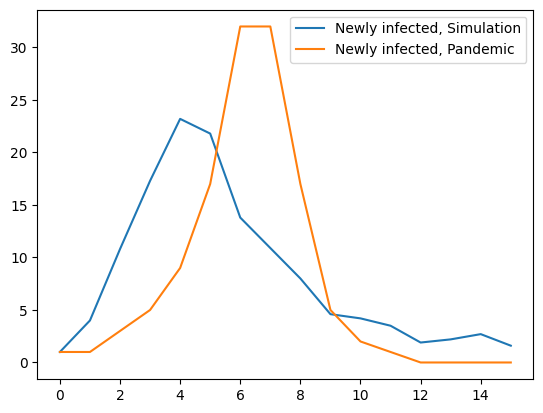

Trying combo: (0.1, 0.25, 9)


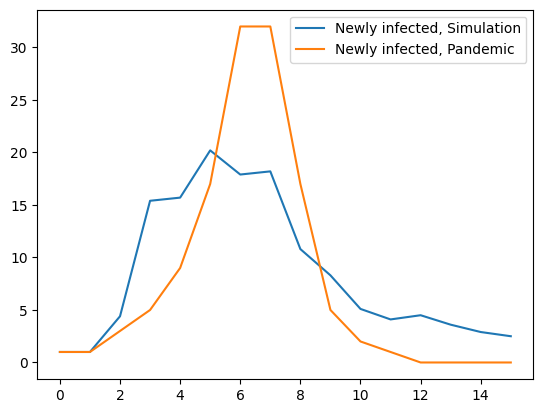

Trying combo: (0.1, 0.3, 7)


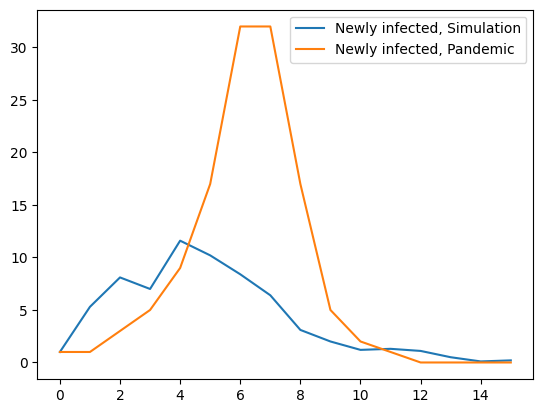

Trying combo: (0.1, 0.3, 8)


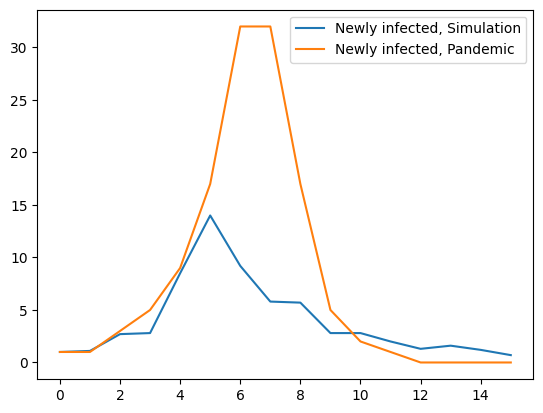

Trying combo: (0.1, 0.3, 9)


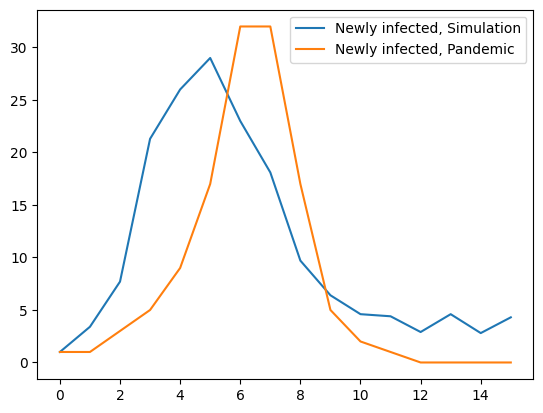

current parameters: 0.1 0.25 9
current error: 6.475530866268803
Trying combo: (0.1, 0.2, 8)


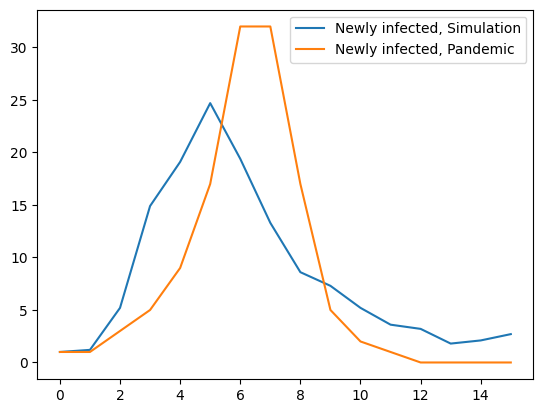

Trying combo: (0.1, 0.2, 9)


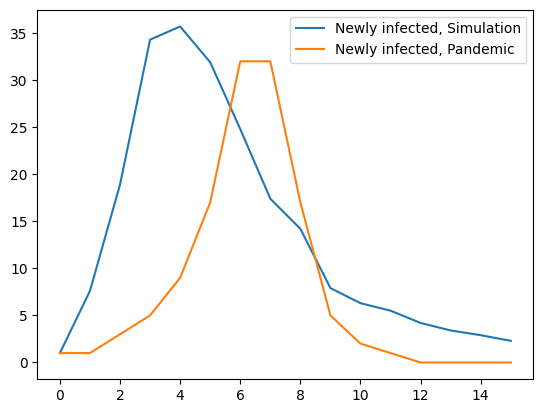

Trying combo: (0.1, 0.2, 10)


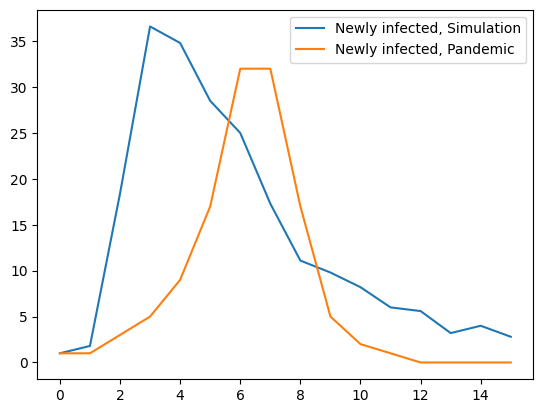

Trying combo: (0.1, 0.25, 8)


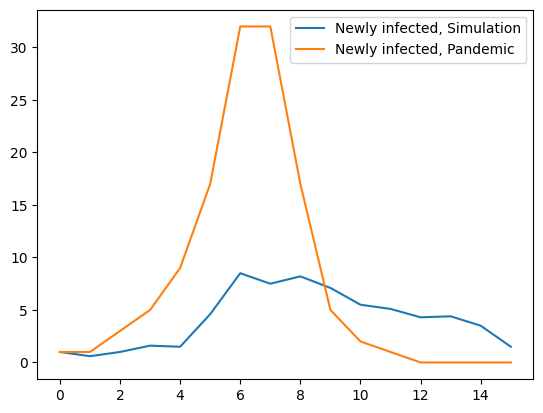

Trying combo: (0.1, 0.25, 9)


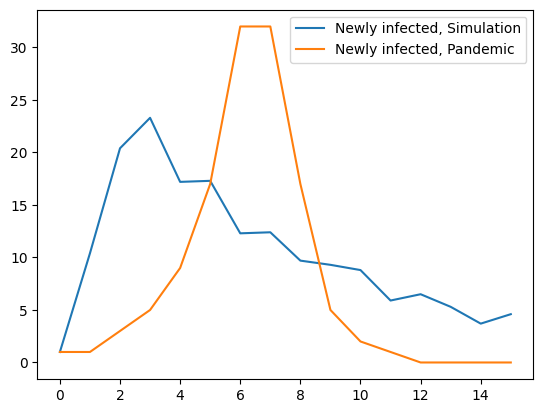

Trying combo: (0.1, 0.25, 10)


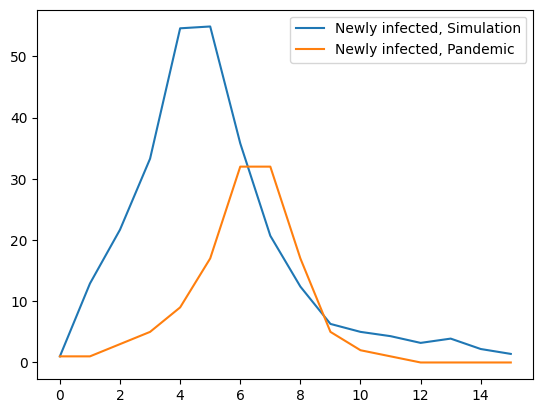

Trying combo: (0.1, 0.3, 8)


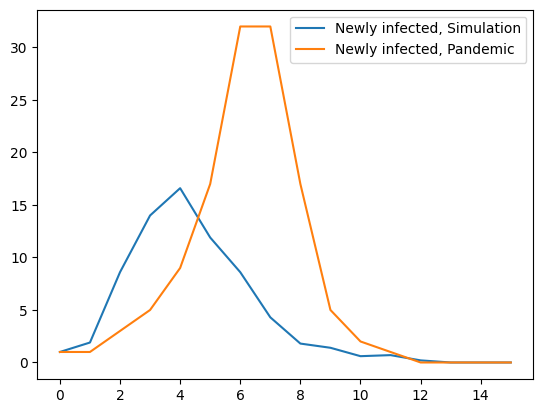

Trying combo: (0.1, 0.3, 9)


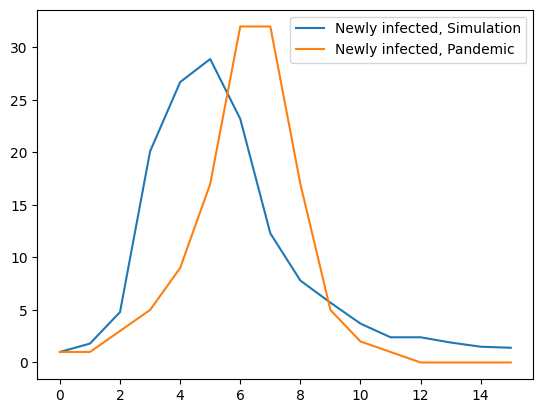

Trying combo: (0.1, 0.3, 10)


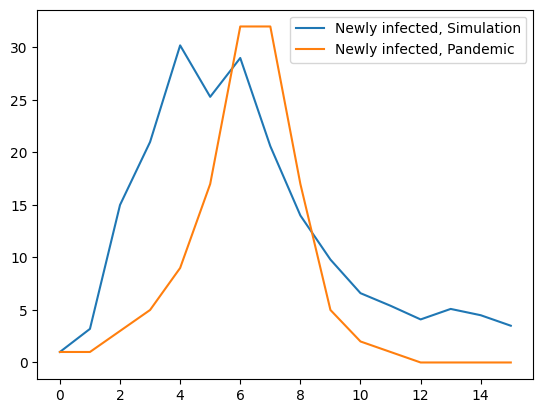

current parameters: 0.1 0.2 8
current error: 7.461023723323764
Trying combo: (0.1, 0.15000000000000002, 7)


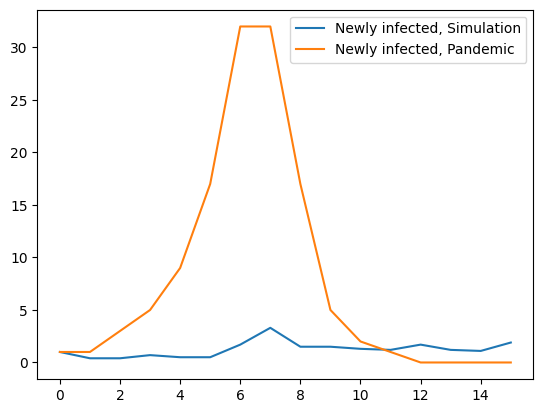

Trying combo: (0.1, 0.15000000000000002, 8)


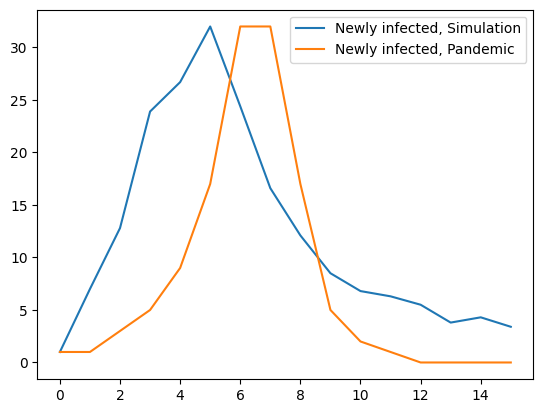

Trying combo: (0.1, 0.15000000000000002, 9)


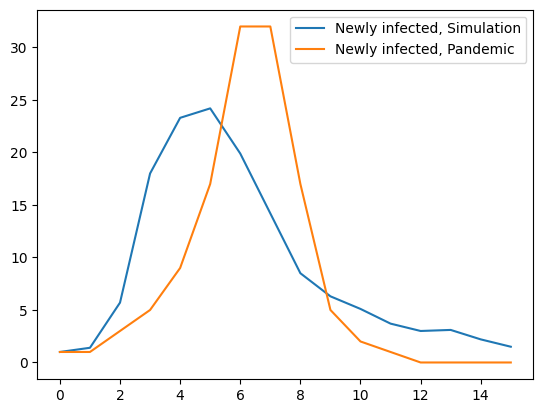

Trying combo: (0.1, 0.2, 7)


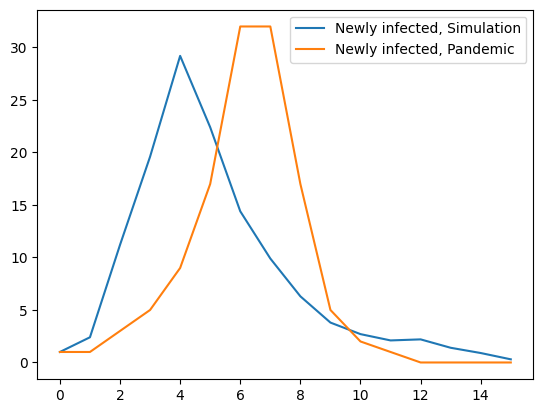

Trying combo: (0.1, 0.2, 8)


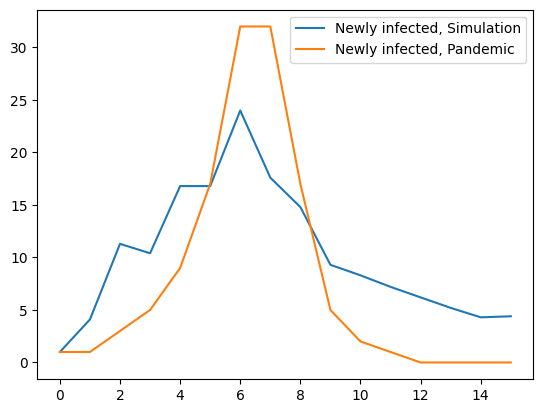

Trying combo: (0.1, 0.2, 9)


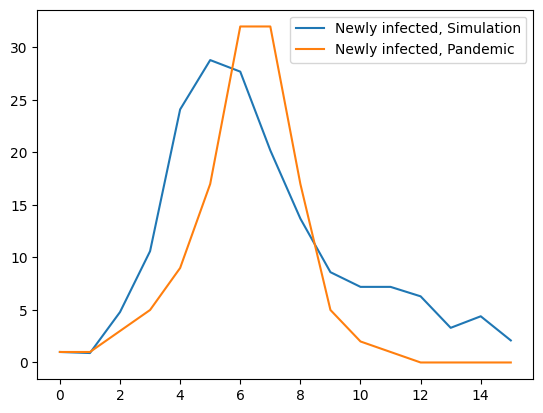

Trying combo: (0.1, 0.25, 7)


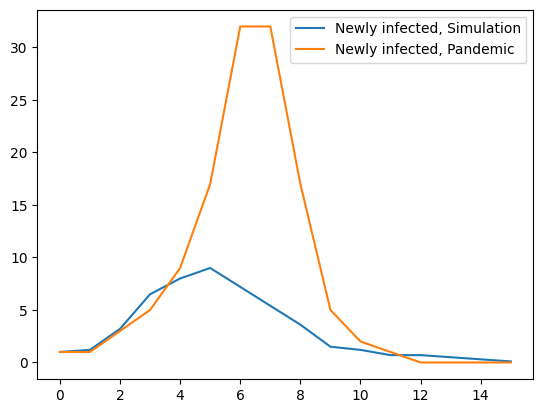

Trying combo: (0.1, 0.25, 8)


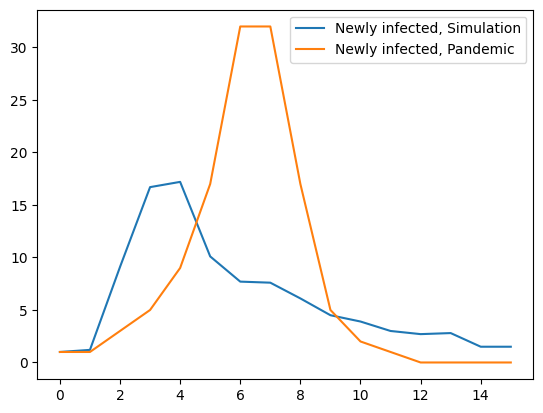

Trying combo: (0.1, 0.25, 9)


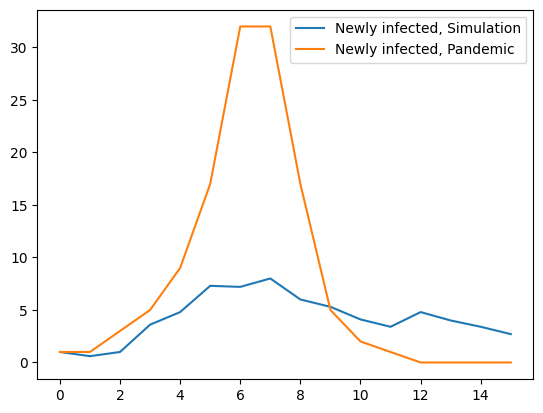

current parameters: 0.1 0.2 8
current error: 6.34768658646597
Trying combo: (0.1, 0.15000000000000002, 7)


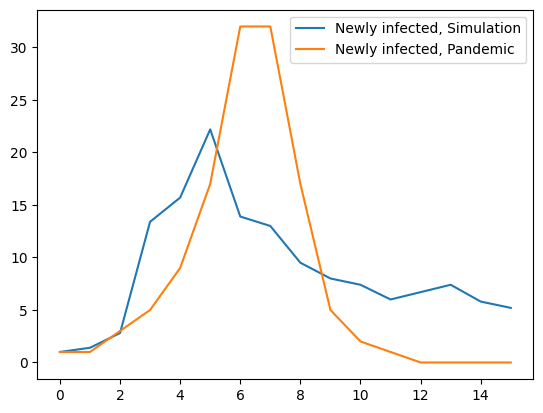

Trying combo: (0.1, 0.15000000000000002, 8)


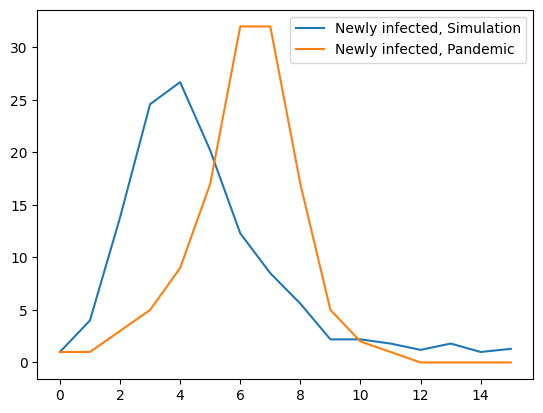

Trying combo: (0.1, 0.15000000000000002, 9)


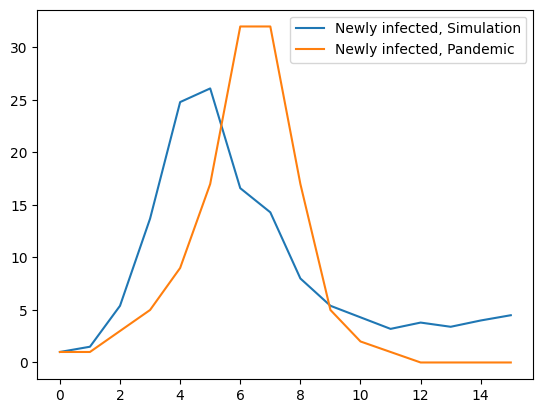

Trying combo: (0.1, 0.2, 7)


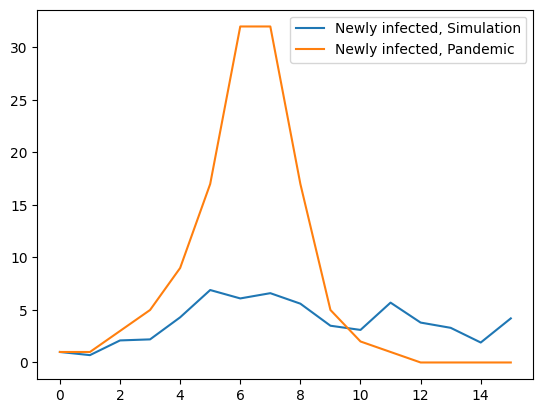

Trying combo: (0.1, 0.2, 8)


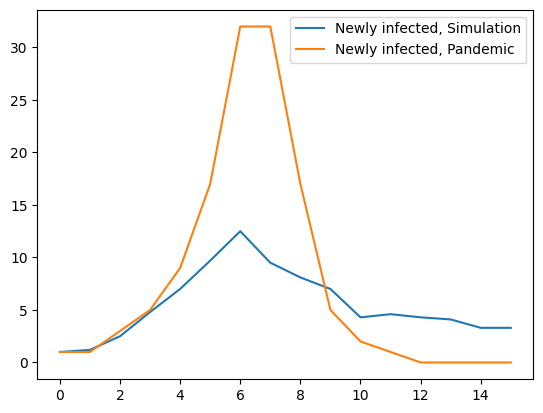

Trying combo: (0.1, 0.2, 9)


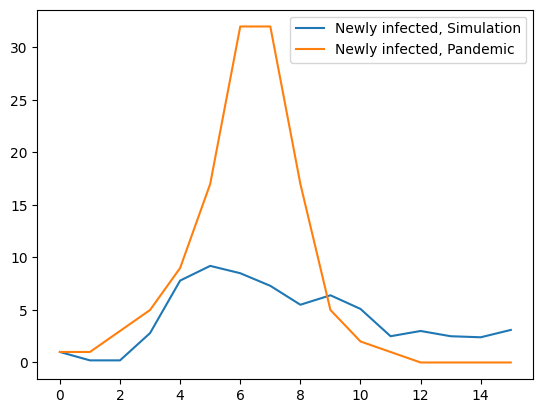

Trying combo: (0.1, 0.25, 7)


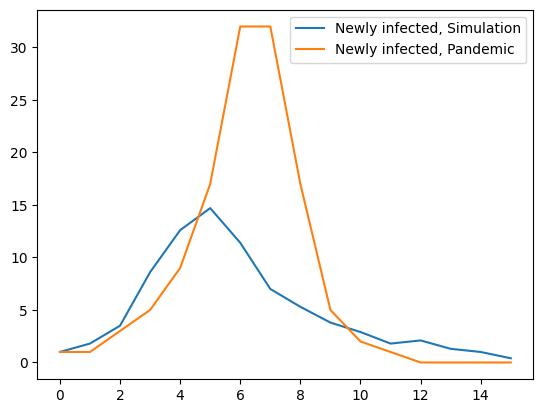

Trying combo: (0.1, 0.25, 8)


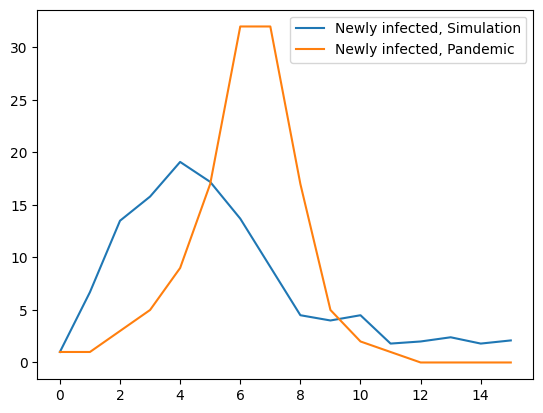

Trying combo: (0.1, 0.25, 9)


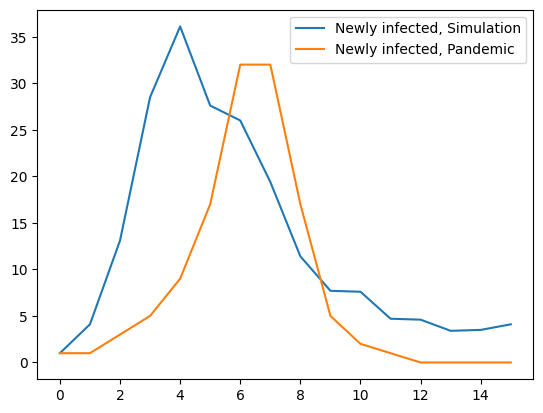

current parameters: 0.1 0.2 8
current error: 8.301581174691965
Trying combo: (0.1, 0.15000000000000002, 7)


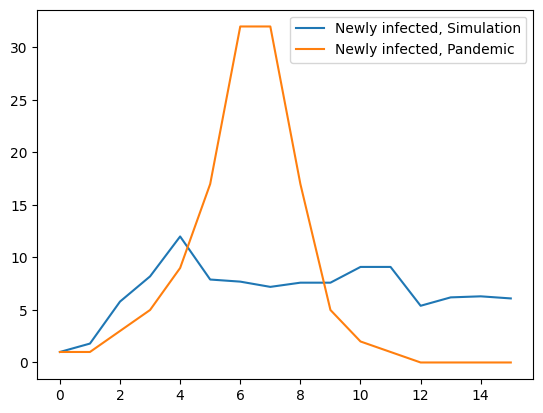

Trying combo: (0.1, 0.15000000000000002, 8)


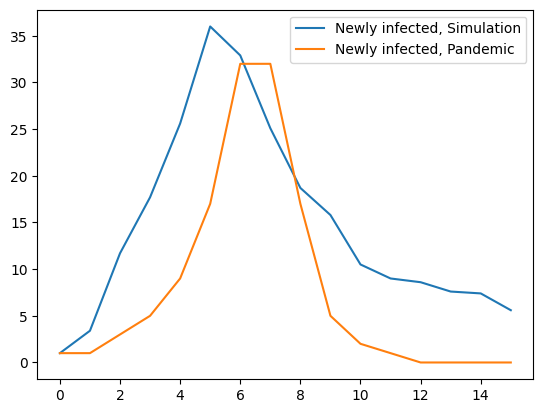

Trying combo: (0.1, 0.15000000000000002, 9)


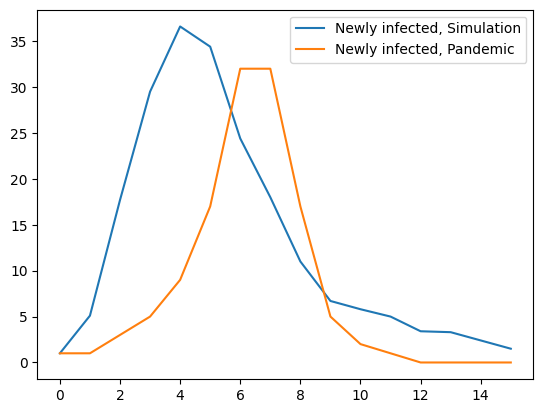

Trying combo: (0.1, 0.2, 7)


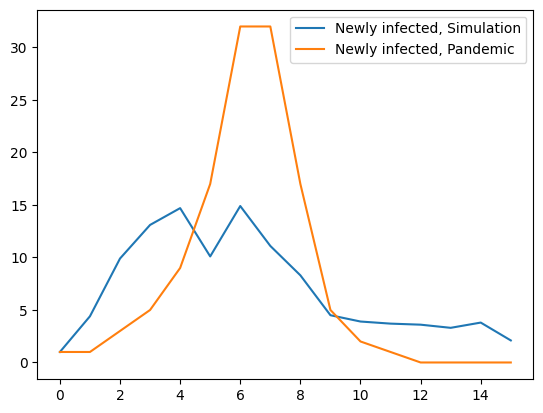

Trying combo: (0.1, 0.2, 8)


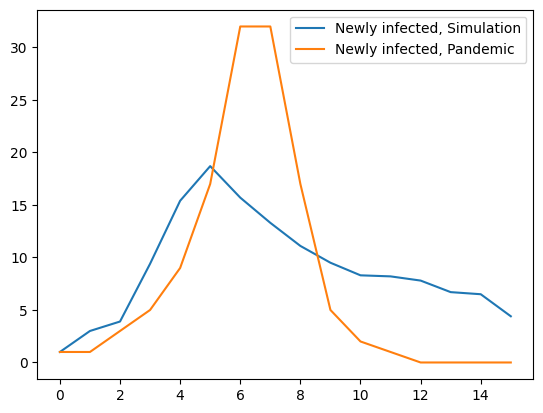

Trying combo: (0.1, 0.2, 9)


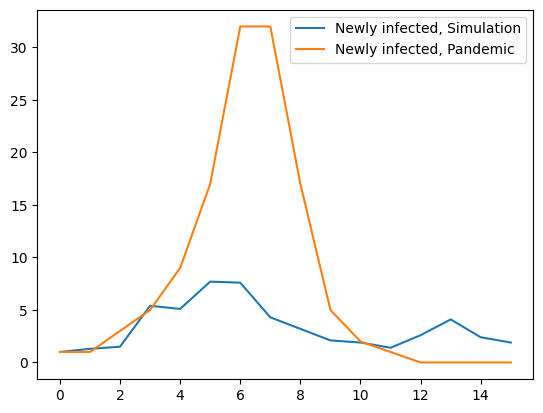

Trying combo: (0.1, 0.25, 7)


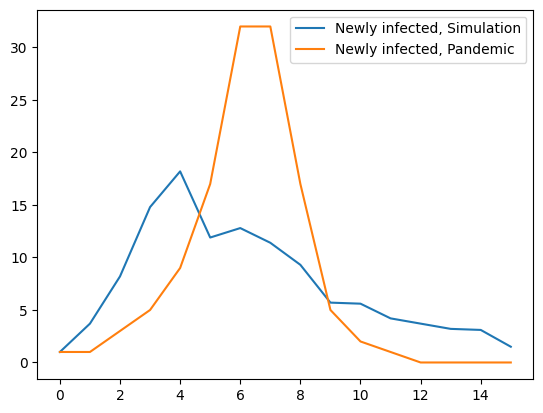

Trying combo: (0.1, 0.25, 8)


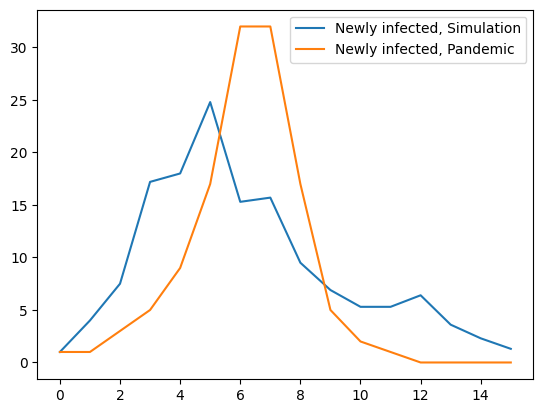

Trying combo: (0.1, 0.25, 9)


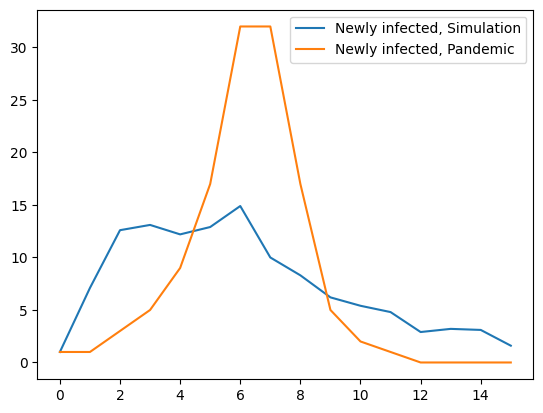

current parameters: 0.1 0.2 8
current error: 7.895132994446642
Trying combo: (0.1, 0.15000000000000002, 7)


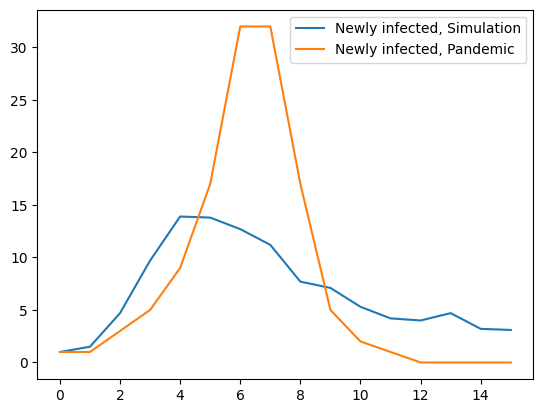

Trying combo: (0.1, 0.15000000000000002, 8)


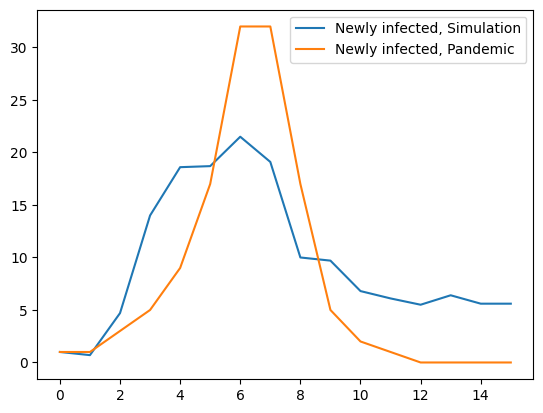

Trying combo: (0.1, 0.15000000000000002, 9)


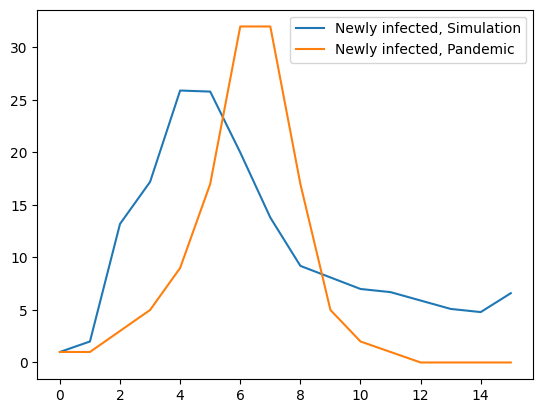

Trying combo: (0.1, 0.2, 7)


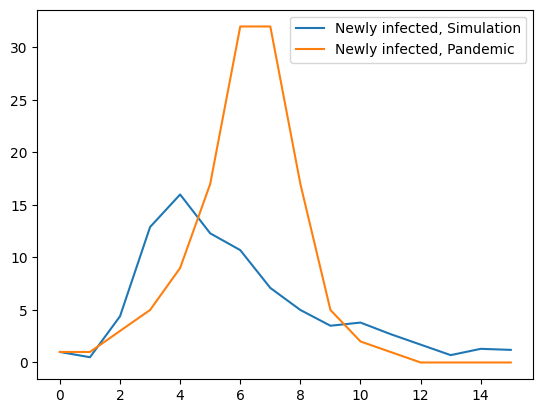

Trying combo: (0.1, 0.2, 8)


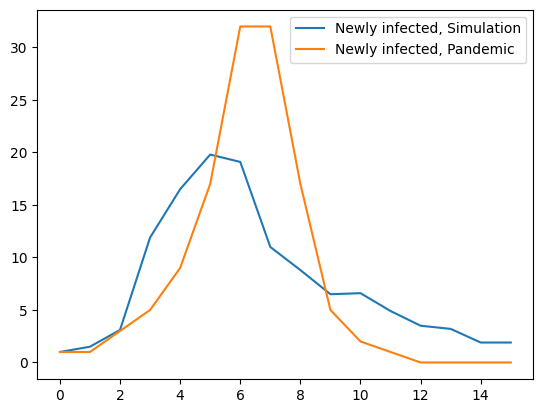

Trying combo: (0.1, 0.2, 9)


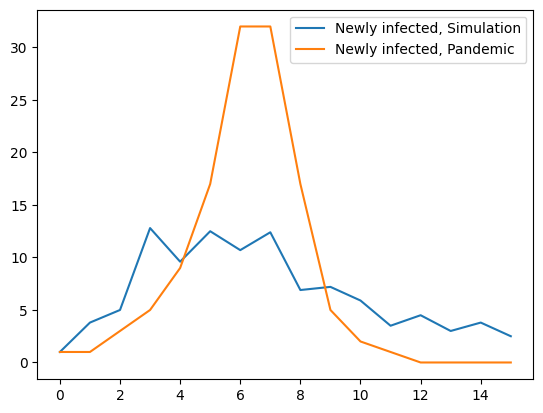

Trying combo: (0.1, 0.25, 7)


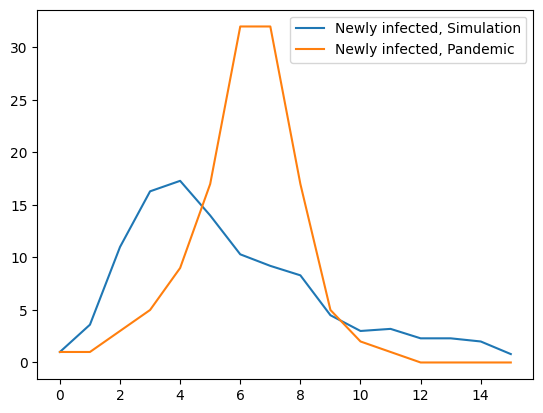

Trying combo: (0.1, 0.25, 8)


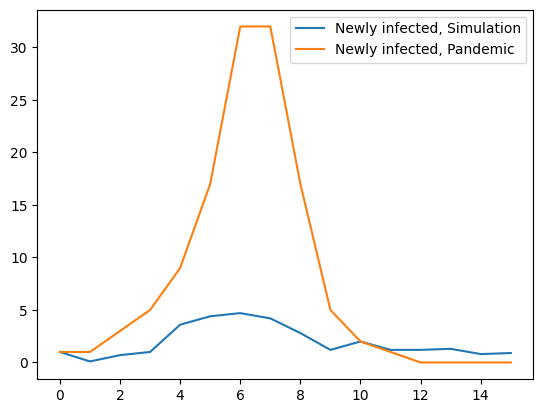

Trying combo: (0.1, 0.25, 9)


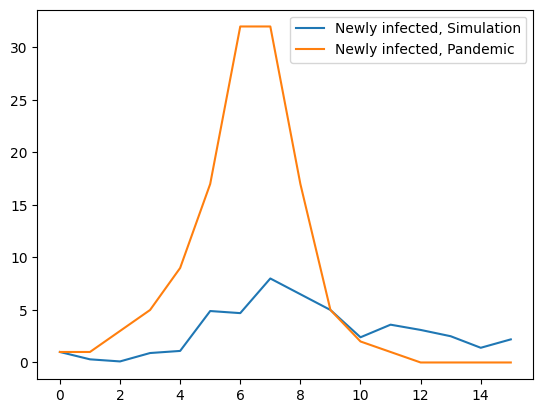

current parameters: 0.1 0.15000000000000002 8
current error: 6.660330322138685
Trying combo: (0.1, 0.10000000000000002, 7)


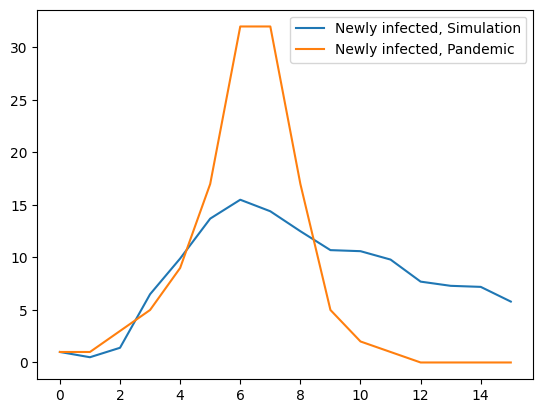

Trying combo: (0.1, 0.10000000000000002, 8)


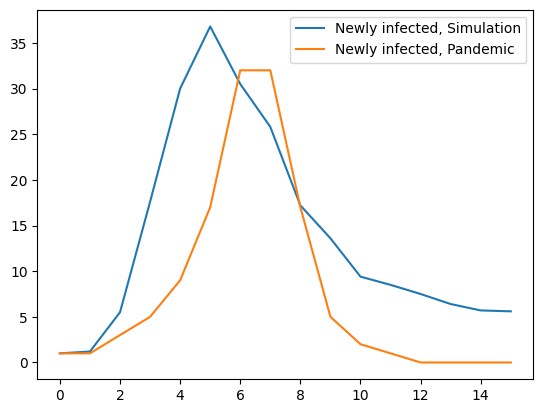

Trying combo: (0.1, 0.10000000000000002, 9)


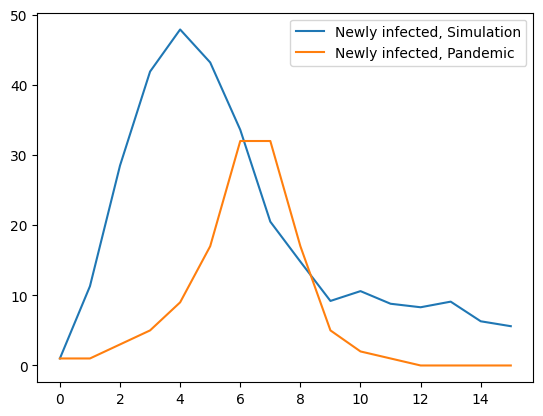

Trying combo: (0.1, 0.15000000000000002, 7)


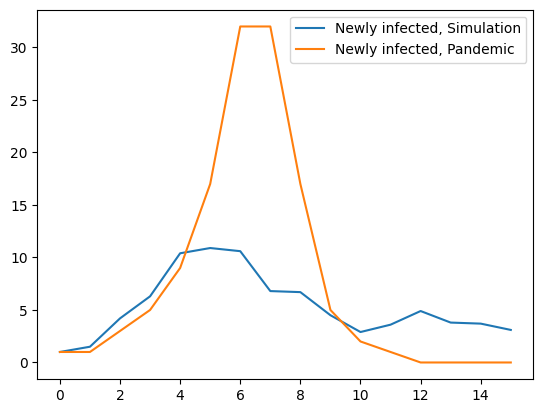

Trying combo: (0.1, 0.15000000000000002, 8)


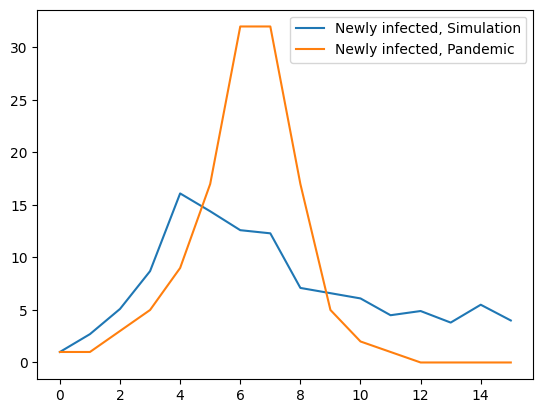

Trying combo: (0.1, 0.15000000000000002, 9)


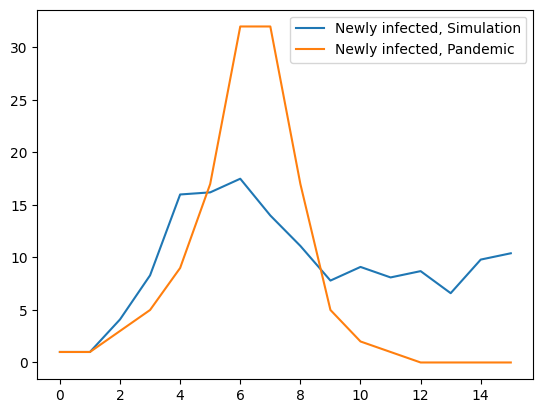

Trying combo: (0.1, 0.2, 7)


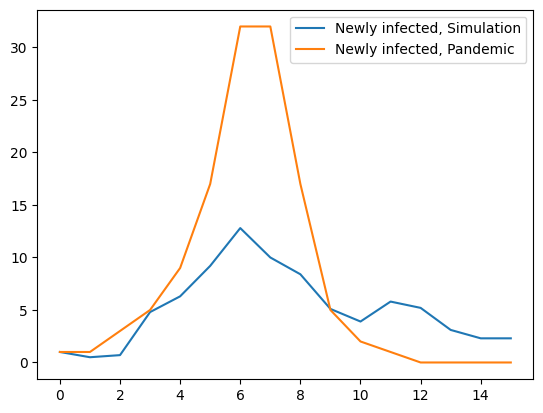

Trying combo: (0.1, 0.2, 8)


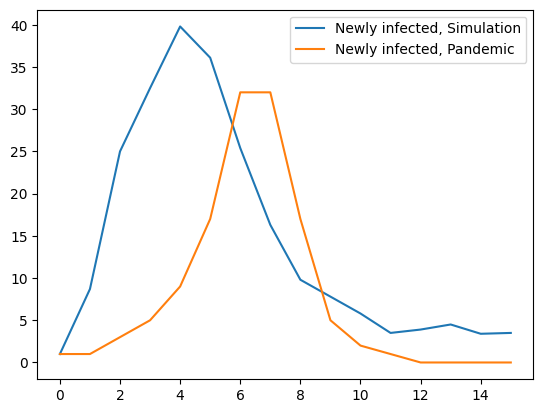

Trying combo: (0.1, 0.2, 9)


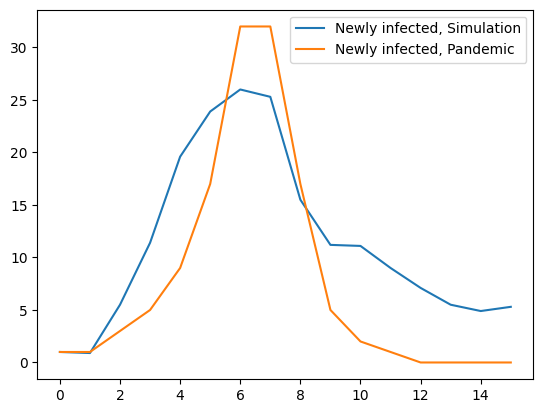

current parameters: 0.1 0.2 9
current error: 6.166137364671663
Trying combo: (0.1, 0.15000000000000002, 8)


KeyboardInterrupt: 

In [ ]:
from hashlib import new
import itertools
#set the intial values the algorithm will start with.
initialBeta = 0.1
initialRho = 0.3
initialK = 9
beta = initialBeta
rho = initialRho
k = initialK
#ground truth of newly Infected people.
infectedGroundTruth = [1, 1, 3, 5, 9, 17, 32, 32, 17, 5, 2, 1, 0, 0, 0, 0]
while(beta == initialBeta, rho == initialRho, k == initialK):
    initialBeta = beta
    initialRho = rho
    initialK = k
    #create current steps potential parameters.
    betas = [beta-0.05, beta, beta + 0.05]
    rhos = [rho-0.05, rho, rho + 0.05]
    ks = [k-1 , k , k + 1]
    #create all combination of the parameters.
    combos = itertools.product(betas, rhos, ks)
    combos = list(combos)
    #keep the list of errors per parameter combination
    errors = []
    for combo in combos:
        newly_infecteds = None
        print("Trying combo:", combo)
        #run the simulation for each combo atleast 10 times.
        for i in range(10):
            G = create_graph(combo[2], 936)
            _, newly_infected,_ = vacModel(G,[5, 9, 16, 24, 32, 40, 47, 54, 59, 60, 60, 60, 60, 60, 60],1,combo[0],combo[1])
            if newly_infecteds is None:
                newly_infecteds = np.array(newly_infected)
            else:
                newly_infecteds += newly_infected
        #calculate the mean newly infected after 10 iterations.
        newly_infecteds = newly_infecteds / 10
        #calculate the error and compare the current plot with the groundtruth.
        RMSE = np.sqrt(np.mean((np.array(newly_infecteds) - np.array(infectedGroundTruth)) ** 2))
        plt.plot(newly_infecteds, label = "Newly infected, Simulation")
        plt.plot(infectedGroundTruth, label = "Newly infected, Pandemic")
        plt.legend()
        plt.show()
        #append the calculated errors.
        errors.append(RMSE)
    #find the parameters with minimum error and rerun the search algorithm with the new parameters.
    np.argmin(errors)
    beta = combos[np.argmin(errors)][0]
    rho = combos[np.argmin(errors)][1]
    k = combos[np.argmin(errors)][2]
    print("current parameters:",beta, rho, k)
    print("current error:", errors[np.argmin(errors)])

print("Optimal parameters:")
print("Beta:", beta)
print("Rho:", rho)
print("K:", k)

